# Lending Club Loan Project

In [1]:
#Libraries Imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis



Text(0.5, 0, 'FICO')

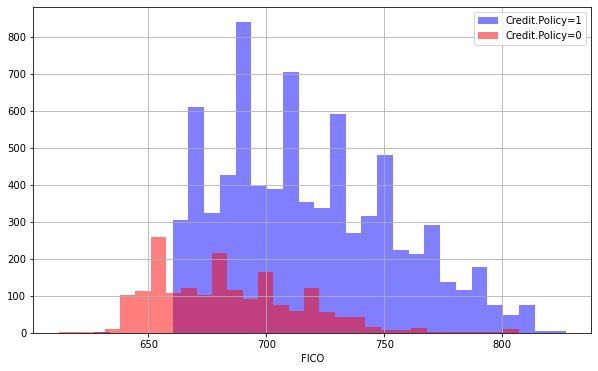

In [6]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

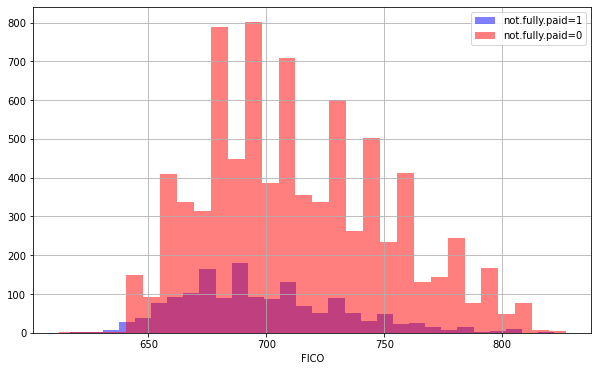

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

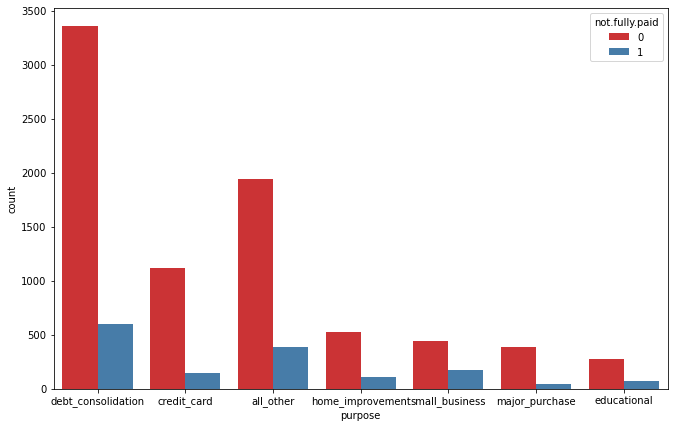

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

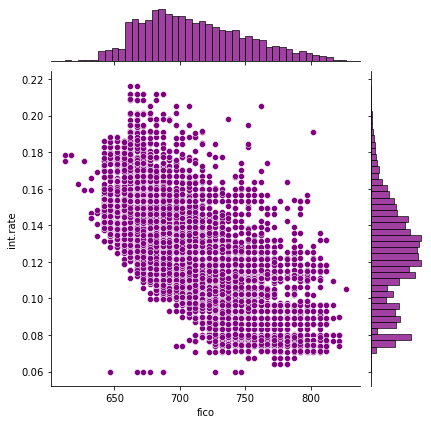

In [11]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 792x504 with 0 Axes>

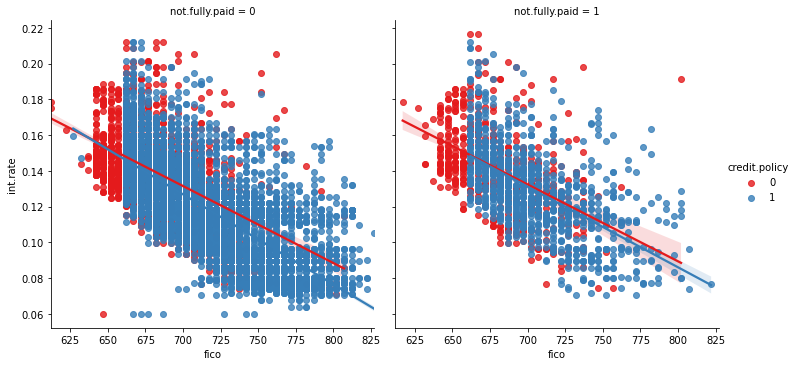

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [14]:
cat_feats = ['purpose']

In [15]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

** Train and fit a logistic regression model on the training set.**

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

### Logistic Regression

In [23]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2014
           1       0.35      0.02      0.03       381

    accuracy                           0.84      2395
   macro avg       0.60      0.51      0.47      2395
weighted avg       0.76      0.84      0.77      2395



In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[2001   13]
 [ 374    7]]


0.8384133611691023

In [27]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
  
# Instantiating RandomizedSearchCV object 
log_cv = RandomizedSearchCV(logmodel,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
log_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(log_cv.best_params_)) 
print("Best score is {}".format(log_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'penalty': 'l2', 'C': 0.01}
Best score is 0.8399008604491692


In [28]:
#Hyperparameter tuning with GridSearch CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
grid_search = GridSearchCV(estimator = logmodel,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.99 %
Best Parameters: {'C': 0.01, 'penalty': 'l2'}


In [29]:
#No need of hyperparameter tuning

In [30]:
#K-Cross Validation #Updated Logistic Regression with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.93 %
Standard Deviation: 0.21 %


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2014
           1       0.35      0.02      0.03       381

    accuracy                           0.84      2395
   macro avg       0.60      0.51      0.47      2395
weighted avg       0.76      0.84      0.77      2395



## KNN Approach

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[1945   69]
 [ 350   31]]


0.8250521920668058

In [34]:
# calculating the accuracy of models with different values of k

In [35]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(100)
for i in range(1,101):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)

mean_acc

array([0.74989562, 0.83298539, 0.79832985, 0.83131524, 0.82505219,
       0.83382046, 0.82922756, 0.83298539, 0.82797495, 0.83173278,
       0.82964509, 0.83507307, 0.83173278, 0.83632568, 0.83632568,
       0.83590814, 0.83465553, 0.83799582, 0.83799582, 0.8388309 ,
       0.83841336, 0.8388309 , 0.83757829, 0.8388309 , 0.84008351,
       0.83924843, 0.83966597, 0.84008351, 0.8388309 , 0.84008351,
       0.84008351, 0.84008351, 0.84008351, 0.84050104, 0.84050104,
       0.84050104, 0.84008351, 0.84050104, 0.84050104, 0.84050104,
       0.84050104, 0.84091858, 0.84091858, 0.84091858, 0.84091858,
       0.84091858, 0.84091858, 0.84091858, 0.84133612, 0.84091858,
       0.84091858, 0.84091858, 0.84091858, 0.84091858, 0.84091858,
       0.84091858, 0.84091858, 0.84091858, 0.84091858, 0.84091858,
       0.84091858, 0.84091858, 0.84091858, 0.84091858, 0.84091858,
       0.84091858, 0.84091858, 0.84091858, 0.84091858, 0.84091858,
       0.84091858, 0.84091858, 0.84091858, 0.84091858, 0.84091

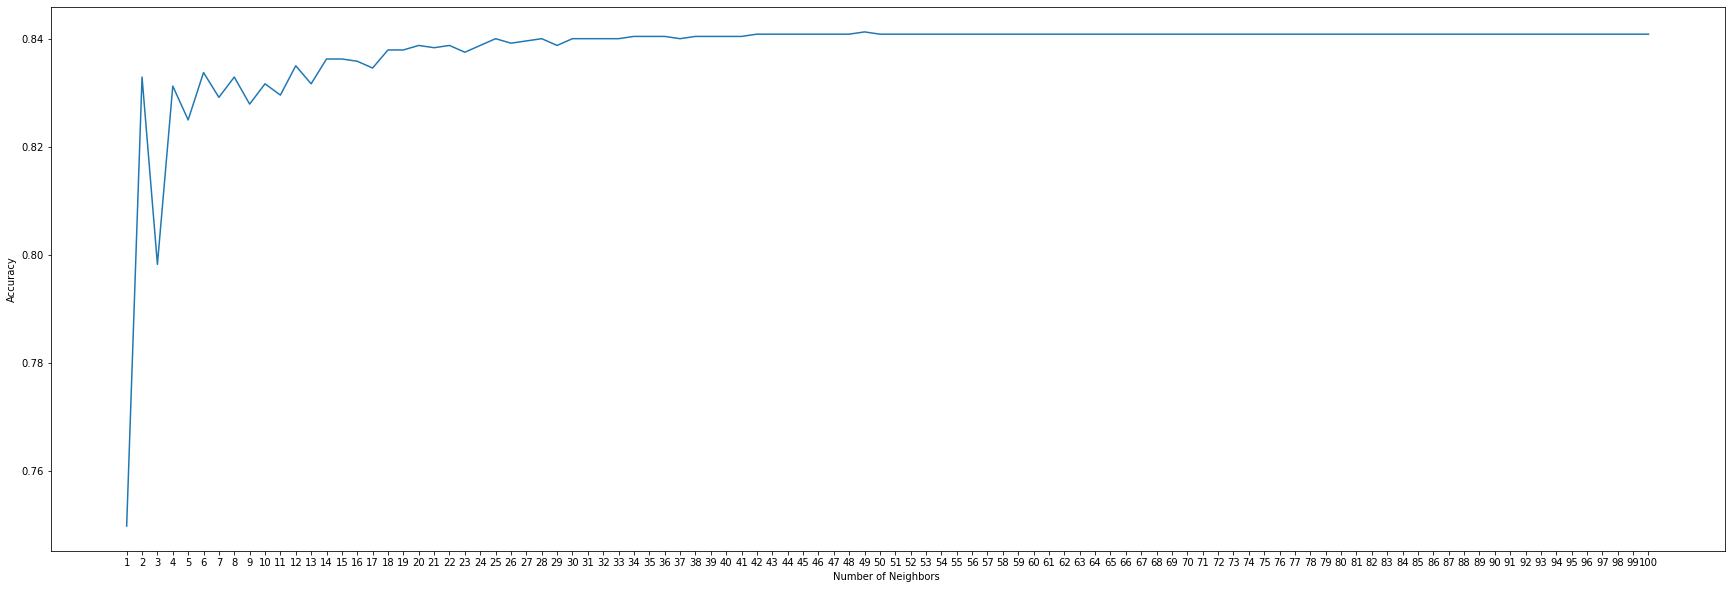

In [36]:
loc = np.arange(1,101,step=1.0)
plt.figure(figsize = (30, 10))
plt.plot(range(1,101), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [37]:
#Hyperparameter Tuning

In [38]:
#List Hyperparameters that we want to tune.
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
grid_params = {'n_neighbors' : [30,50,70,100],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : list(range(1,50)),
               'p' : [1,2]}
  
  
# Instantiating RandomizedSearchCV object 
knn_cv = RandomizedSearchCV(classifier1,grid_params, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
knn_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_)) 


Tuned KNN Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 30, 'metric': 'minkowski', 'leaf_size': 34}
Best score is 0.8397608098527435


In [40]:
classifier1_new = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 1,leaf_size=34)
classifier1_new.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=34, n_neighbors=30, p=1)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1_new = classifier1_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred1_new)
print(cm)
accuracy_score(y_test, y_pred1_new)

[[2011    3]
 [ 379    2]]


0.8405010438413362

In [42]:
#K-Cross Validation #Updated KNN with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 83.98 %
Standard Deviation: 0.13 %


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1_new))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2014
           1       0.40      0.01      0.01       381

    accuracy                           0.84      2395
   macro avg       0.62      0.50      0.46      2395
weighted avg       0.77      0.84      0.77      2395



## SVM Approach

In [44]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[2014    0]
 [ 381    0]]


0.8409185803757829

In [46]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
  
# Instantiating RandomizedSearchCV object 
tree_cv2 = RandomizedSearchCV(classifier2,param_dist2, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv2.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned SVC Parameters: {}".format(tree_cv2.best_params_)) 
print("Best score is {}".format(tree_cv2.best_score_)) 

Tuned SVC Parameters: {'kernel': 'rbf', 'gamma': 0.6, 'degree': 1, 'C': 0.75}
Best score is 0.8401784434431914


In [47]:
#No need of hyperparameter tuning

In [48]:
#K-Cross Validation #Updated SVC with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))


Accuracy: 83.96 %
Standard Deviation: 0.05 %


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2014
           1       0.00      0.00      0.00       381

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395



/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes Approach

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB()

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[1745  269]
 [ 263  118]]


0.7778705636743215

In [53]:
#K-Cross Validation #Updated Naive Bayes with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))


Accuracy: 77.59 %
Standard Deviation: 1.52 %


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2014
           1       0.30      0.31      0.31       381

    accuracy                           0.78      2395
   macro avg       0.59      0.59      0.59      2395
weighted avg       0.78      0.78      0.78      2395



In [55]:
#There are some algorithms like Decision Tree and Ensemble Techniques
#(like AdaBoost and XGBoost) that do not require scaling 
#because splitting in these cases are based on the values
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""


'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n'

## Decision Tree Classification Approach

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[1662  352]
 [ 295   86]]


0.7298538622129437

In [60]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist4 = {"max_depth": [2, 6, 8,10,12,14], 
              "min_samples_split": [2,4,10,12,16,20,24],
              "max_features": [2,3,4,5,6],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,90,100],
              "criterion": ["gini", "entropy"]} 
   
  
# Instantiating RandomizedSearchCV object 
tree_cv4 = RandomizedSearchCV(classifier4,param_dist4, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv4.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv4.best_params_)) 
print("Best score is {}".format(tree_cv4.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_split': 4, 'min_samples_leaf': 8, 'max_leaf_nodes': 10, 'max_features': 4, 'max_depth': 6, 'criterion': 'gini'}
Best score is 0.8399002793263625


In [61]:
classifier4_new = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=6,max_features=4,min_samples_leaf=8,min_samples_split=4,max_leaf_nodes=10)
classifier4_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=4, max_leaf_nodes=10,
                       min_samples_leaf=8, min_samples_split=4, random_state=0)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4_new = classifier4_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred4_new)
print(cm)
accuracy_score(y_test, y_pred4_new)

[[2010    4]
 [ 378    3]]


0.8405010438413362

In [63]:
#K-Cross Validation #Updated Decision Tree with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies4 = cross_val_score(estimator = classifier4_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))


Accuracy: 83.99 %
Standard Deviation: 0.23 %


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4_new))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2014
           1       0.43      0.01      0.02       381

    accuracy                           0.84      2395
   macro avg       0.64      0.50      0.46      2395
weighted avg       0.78      0.84      0.77      2395



## Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)

[[2005    9]
 [ 373    8]]


0.8405010438413362

In [67]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist5 ={"n_estimators": [20,30,50,100],
            "max_features": ['auto', 'sqrt', 'log2',5,10],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 6, 8,10,12],
            "bootstrap": [True, False]} 
  
# Instantiating RandomizedSearchCV object 
tree_cv5 = RandomizedSearchCV(classifier5,param_dist5, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv5.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(tree_cv5.best_params_)) 
print("Best score is {}".format(tree_cv5.best_score_)) 

Tuned Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
Best score is 0.8397610035603457


In [68]:
#No need of hyperparameter tuning

In [69]:
#K-Cross Validation #Updated Random Forest with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies5 = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))


Accuracy: 83.92 %
Standard Deviation: 0.36 %


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2014
           1       0.47      0.02      0.04       381

    accuracy                           0.84      2395
   macro avg       0.66      0.51      0.48      2395
weighted avg       0.78      0.84      0.77      2395



### ADABOOST CLASSIFIER

In [71]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1985   29]
 [ 363   18]]


0.8363256784968685

In [73]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid
param_dist = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20,30,50,100,200],
    'learning_rate': [0.01,0.1,0.5,0.8,1],
    'algorithm': ['SAMME', 'SAMME.R']
             }
  

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Adaboost Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Adaboost Parameters: {'n_estimators': 200, 'learning_rate': 1, 'algorithm': 'SAMME'}
Best score is 0.8398998919111579


In [74]:
tree_cv.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=200)

In [76]:
#No hyperparameter tuning required since we are getting better accuracy

In [77]:
#K-Cross Validation Updated Adaboost with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 83.91 %
Standard Deviation: 0.36 %


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2014
           1       0.38      0.05      0.08       381

    accuracy                           0.84      2395
   macro avg       0.61      0.52      0.50      2395
weighted avg       0.77      0.84      0.78      2395



In [100]:
#Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2002   12]
 [ 369   12]]


0.8409185803757829

In [81]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {'learning_rate':[1,0.50,0.25,0.15,0.1,0.05,0.01,0.005,0.001],
           'n_estimators':[50,100,250,500,750,1000,1500],
           'max_depth':[2,3,4,5,6,7,8,9,10,12,14,16],
           'min_samples_split':[2,4,8,10,20,40,60,100],
           'min_samples_leaf':[1,3,5,7,9,10,20],
           'max_features':[2,3,4,5,6,7,8,9,10],
           'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95,1]}

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Gradient Boosting Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Gradient Boosting Parameters: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 60, 'min_samples_leaf': 10, 'max_features': 6, 'max_depth': 4, 'learning_rate': 0.005}
Best score is 0.8399002793263625


In [82]:
tree_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.005, max_depth=4, max_features=6,
                           min_samples_leaf=10, min_samples_split=60,
                           n_estimators=500, subsample=0.6)

In [83]:
#No hyperparameter tuning required since we are getting better accuracy

In [84]:
from sklearn.model_selection import cross_val_score
accuracies_new = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_new.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_new.std()*100))

Accuracy: 83.80 %
Standard Deviation: 0.25 %


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2014
           1       0.50      0.03      0.06       381

    accuracy                           0.84      2395
   macro avg       0.67      0.51      0.49      2395
weighted avg       0.79      0.84      0.78      2395



In [86]:
#LightGBM (Light Gradient Boosting Machine)

In [87]:
import lightgbm as lgb
  
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1990   24]
 [ 357   24]]


0.8409185803757829

In [89]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {
'max_depth':[2,3,4,5,6,7,8,10,12,14,16,18,20],
'num_leaves':[10,20,30,40,50,60,70,80],
'learning_rate': [0.01,0.02,0.04,0.05,0.1,0.2,0.5,1],
'n_estimators':[50,100,200,500,1000],
'min_data_in_leaf':[100,200,300,500,800,1000],
'colsample_bytree': [0.5,1.0],
'subsample': [0.5,1.0],
'subsample_freq':[0,1],
'feature_fraction':[0.8,1.0],
'bagging_fraction':[0.8,1.0]

}


# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned LightGBM Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
Tuned LightGBM Parameters: {'subsample_freq': 1, 'subsample': 1.0, 'num_leaves': 60, 'n_estimators': 1000, 'min_data_in_leaf': 300, 'max_depth': 20, 'learning_rate': 0.01, 'feature_fraction': 1.0, 'colsample_bytree': 0.5, 'bagging_fraction': 0.8}
Best score is 0.8400389739695724


In [90]:
tree_cv.best_estimator_

LGBMClassifier(bagging_fraction=0.8, colsample_bytree=0.5, feature_fraction=1.0,
               learning_rate=0.01, max_depth=20, min_data_in_leaf=300,
               n_estimators=1000, num_leaves=60, subsample_freq=1)

In [91]:
#No hyperparameter tuning required since we are getting better accuracy

In [92]:
from sklearn.model_selection import cross_val_score
accuracies_new = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_new.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_new.std()*100))

Accuracy: 83.60 %
Standard Deviation: 0.53 %


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2014
           1       0.50      0.06      0.11       381

    accuracy                           0.84      2395
   macro avg       0.67      0.53      0.51      2395
weighted avg       0.79      0.84      0.79      2395



In [94]:
#XGBoost Classification

In [96]:
from xgboost import XGBClassifier
classifier6 = XGBClassifier()
classifier6.fit(X_train, y_train)

/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:23:18] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = classifier6.predict(X_test)
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[1947   67]
 [ 337   44]]


0.8313152400835073

In [99]:
#No hyperparameter tuning required

In [100]:
#K-Cross Validation #Updated XGBOOST Classifier with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies6 = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:03:25] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:03:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:03:32] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:03:35] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2014
           1       0.40      0.12      0.18       381

    accuracy                           0.83      2395
   macro avg       0.62      0.54      0.54      2395
weighted avg       0.78      0.83      0.79      2395



### CatBoost Classifier


In [102]:
from catboost import CatBoostClassifier
classifier8 = CatBoostClassifier()
classifier8.fit(X_train, y_train)

Learning rate set to 0.02391
0:	learn: 0.6784907	total: 98.7ms	remaining: 1m 38s
1:	learn: 0.6643532	total: 130ms	remaining: 1m 4s
2:	learn: 0.6510087	total: 155ms	remaining: 51.5s
3:	learn: 0.6383535	total: 177ms	remaining: 44s
4:	learn: 0.6266758	total: 196ms	remaining: 38.9s
5:	learn: 0.6156960	total: 238ms	remaining: 39.4s
6:	learn: 0.6049573	total: 251ms	remaining: 35.6s
7:	learn: 0.5950397	total: 259ms	remaining: 32.1s
8:	learn: 0.5858151	total: 265ms	remaining: 29.2s
9:	learn: 0.5764671	total: 274ms	remaining: 27.1s
10:	learn: 0.5677567	total: 293ms	remaining: 26.4s
11:	learn: 0.5597982	total: 306ms	remaining: 25.2s
12:	learn: 0.5522255	total: 315ms	remaining: 23.9s
13:	learn: 0.5448166	total: 324ms	remaining: 22.8s
14:	learn: 0.5381784	total: 334ms	remaining: 21.9s
15:	learn: 0.5317756	total: 342ms	remaining: 21.1s
16:	learn: 0.5258275	total: 352ms	remaining: 20.3s
17:	learn: 0.5203641	total: 360ms	remaining: 19.7s
18:	learn: 0.5147978	total: 370ms	remaining: 19.1s
19:	learn: 0

169:	learn: 0.3896099	total: 2.16s	remaining: 10.5s
170:	learn: 0.3895130	total: 2.17s	remaining: 10.5s
171:	learn: 0.3894618	total: 2.17s	remaining: 10.5s
172:	learn: 0.3892359	total: 2.19s	remaining: 10.5s
173:	learn: 0.3890541	total: 2.21s	remaining: 10.5s
174:	learn: 0.3889068	total: 2.22s	remaining: 10.4s
175:	learn: 0.3887299	total: 2.23s	remaining: 10.4s
176:	learn: 0.3885033	total: 2.23s	remaining: 10.4s
177:	learn: 0.3883808	total: 2.24s	remaining: 10.4s
178:	learn: 0.3882042	total: 2.25s	remaining: 10.3s
179:	learn: 0.3880493	total: 2.26s	remaining: 10.3s
180:	learn: 0.3878416	total: 2.27s	remaining: 10.3s
181:	learn: 0.3875454	total: 2.29s	remaining: 10.3s
182:	learn: 0.3872728	total: 2.3s	remaining: 10.3s
183:	learn: 0.3871220	total: 2.31s	remaining: 10.2s
184:	learn: 0.3870390	total: 2.32s	remaining: 10.2s
185:	learn: 0.3868892	total: 2.33s	remaining: 10.2s
186:	learn: 0.3867024	total: 2.33s	remaining: 10.1s
187:	learn: 0.3865673	total: 2.35s	remaining: 10.2s
188:	learn: 0

336:	learn: 0.3657176	total: 3.77s	remaining: 7.41s
337:	learn: 0.3656058	total: 3.78s	remaining: 7.41s
338:	learn: 0.3654474	total: 3.79s	remaining: 7.39s
339:	learn: 0.3652524	total: 3.81s	remaining: 7.39s
340:	learn: 0.3651908	total: 3.81s	remaining: 7.37s
341:	learn: 0.3650874	total: 3.82s	remaining: 7.35s
342:	learn: 0.3649935	total: 3.83s	remaining: 7.34s
343:	learn: 0.3648609	total: 3.84s	remaining: 7.32s
344:	learn: 0.3645901	total: 3.85s	remaining: 7.31s
345:	learn: 0.3644599	total: 3.86s	remaining: 7.29s
346:	learn: 0.3643184	total: 3.87s	remaining: 7.27s
347:	learn: 0.3642146	total: 3.87s	remaining: 7.25s
348:	learn: 0.3640723	total: 3.88s	remaining: 7.24s
349:	learn: 0.3638981	total: 3.89s	remaining: 7.22s
350:	learn: 0.3637320	total: 3.89s	remaining: 7.2s
351:	learn: 0.3636587	total: 3.9s	remaining: 7.18s
352:	learn: 0.3635051	total: 3.91s	remaining: 7.17s
353:	learn: 0.3633777	total: 3.92s	remaining: 7.15s
354:	learn: 0.3631510	total: 3.93s	remaining: 7.14s
355:	learn: 0.

506:	learn: 0.3430107	total: 5.39s	remaining: 5.24s
507:	learn: 0.3428439	total: 5.4s	remaining: 5.23s
508:	learn: 0.3426133	total: 5.41s	remaining: 5.22s
509:	learn: 0.3424644	total: 5.42s	remaining: 5.21s
510:	learn: 0.3423203	total: 5.43s	remaining: 5.2s
511:	learn: 0.3421314	total: 5.44s	remaining: 5.18s
512:	learn: 0.3419599	total: 5.45s	remaining: 5.17s
513:	learn: 0.3418546	total: 5.46s	remaining: 5.16s
514:	learn: 0.3417118	total: 5.47s	remaining: 5.15s
515:	learn: 0.3415704	total: 5.47s	remaining: 5.13s
516:	learn: 0.3414492	total: 5.49s	remaining: 5.13s
517:	learn: 0.3413953	total: 5.5s	remaining: 5.11s
518:	learn: 0.3412611	total: 5.5s	remaining: 5.1s
519:	learn: 0.3411373	total: 5.51s	remaining: 5.09s
520:	learn: 0.3409720	total: 5.52s	remaining: 5.07s
521:	learn: 0.3409237	total: 5.53s	remaining: 5.06s
522:	learn: 0.3407312	total: 5.53s	remaining: 5.05s
523:	learn: 0.3405722	total: 5.54s	remaining: 5.03s
524:	learn: 0.3404515	total: 5.55s	remaining: 5.02s
525:	learn: 0.340

683:	learn: 0.3186272	total: 7s	remaining: 3.23s
684:	learn: 0.3185168	total: 7.01s	remaining: 3.22s
685:	learn: 0.3183368	total: 7.01s	remaining: 3.21s
686:	learn: 0.3181943	total: 7.02s	remaining: 3.2s
687:	learn: 0.3180527	total: 7.03s	remaining: 3.19s
688:	learn: 0.3178799	total: 7.04s	remaining: 3.18s
689:	learn: 0.3176845	total: 7.05s	remaining: 3.17s
690:	learn: 0.3176026	total: 7.06s	remaining: 3.16s
691:	learn: 0.3175476	total: 7.07s	remaining: 3.15s
692:	learn: 0.3173907	total: 7.08s	remaining: 3.13s
693:	learn: 0.3171727	total: 7.08s	remaining: 3.12s
694:	learn: 0.3170520	total: 7.09s	remaining: 3.11s
695:	learn: 0.3169013	total: 7.1s	remaining: 3.1s
696:	learn: 0.3168448	total: 7.11s	remaining: 3.09s
697:	learn: 0.3166759	total: 7.12s	remaining: 3.08s
698:	learn: 0.3165309	total: 7.13s	remaining: 3.07s
699:	learn: 0.3163209	total: 7.14s	remaining: 3.06s
700:	learn: 0.3163122	total: 7.15s	remaining: 3.05s
701:	learn: 0.3162129	total: 7.16s	remaining: 3.04s
702:	learn: 0.3161

847:	learn: 0.2998185	total: 8.6s	remaining: 1.54s
848:	learn: 0.2997054	total: 8.6s	remaining: 1.53s
849:	learn: 0.2996090	total: 8.61s	remaining: 1.52s
850:	learn: 0.2995355	total: 8.62s	remaining: 1.51s
851:	learn: 0.2994084	total: 8.63s	remaining: 1.5s
852:	learn: 0.2992898	total: 8.64s	remaining: 1.49s
853:	learn: 0.2991221	total: 8.65s	remaining: 1.48s
854:	learn: 0.2989401	total: 8.66s	remaining: 1.47s
855:	learn: 0.2988112	total: 8.66s	remaining: 1.46s
856:	learn: 0.2986984	total: 8.67s	remaining: 1.45s
857:	learn: 0.2985809	total: 8.68s	remaining: 1.44s
858:	learn: 0.2984861	total: 8.7s	remaining: 1.43s
859:	learn: 0.2984090	total: 8.7s	remaining: 1.42s
860:	learn: 0.2983270	total: 8.71s	remaining: 1.41s
861:	learn: 0.2982355	total: 8.72s	remaining: 1.4s
862:	learn: 0.2981265	total: 8.73s	remaining: 1.39s
863:	learn: 0.2979879	total: 8.75s	remaining: 1.38s
864:	learn: 0.2978911	total: 8.76s	remaining: 1.37s
865:	learn: 0.2978005	total: 8.77s	remaining: 1.36s
866:	learn: 0.2976

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred8 = classifier8.predict(X_test)
cm = confusion_matrix(y_test, y_pred8)
print(cm)
accuracy_score(y_test, y_pred8)

[[1998   16]
 [ 369   12]]


0.8392484342379958

In [104]:
#K-Cross Validation #Updated CatBOOST Classifier with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies8 = cross_val_score(estimator = classifier8, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies8.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies8.std()*100))


Learning rate set to 0.022857
0:	learn: 0.6790304	total: 6.31ms	remaining: 6.31s
1:	learn: 0.6654535	total: 17.1ms	remaining: 8.53s
2:	learn: 0.6526224	total: 24.7ms	remaining: 8.21s
3:	learn: 0.6404521	total: 31ms	remaining: 7.71s
4:	learn: 0.6291214	total: 37.9ms	remaining: 7.55s
5:	learn: 0.6185037	total: 45.5ms	remaining: 7.54s
6:	learn: 0.6083463	total: 53.3ms	remaining: 7.56s
7:	learn: 0.5987144	total: 59.9ms	remaining: 7.42s
8:	learn: 0.5896388	total: 66.3ms	remaining: 7.3s
9:	learn: 0.5805152	total: 73.7ms	remaining: 7.3s
10:	learn: 0.5718940	total: 83.1ms	remaining: 7.47s
11:	learn: 0.5644582	total: 95.2ms	remaining: 7.84s
12:	learn: 0.5569939	total: 115ms	remaining: 8.73s
13:	learn: 0.5496782	total: 127ms	remaining: 8.92s
14:	learn: 0.5429437	total: 142ms	remaining: 9.3s
15:	learn: 0.5365643	total: 148ms	remaining: 9.13s
16:	learn: 0.5304473	total: 157ms	remaining: 9.07s
17:	learn: 0.5249611	total: 170ms	remaining: 9.28s
18:	learn: 0.5194089	total: 183ms	remaining: 9.45s
19:	

162:	learn: 0.3894164	total: 2.05s	remaining: 10.5s
163:	learn: 0.3892567	total: 2.06s	remaining: 10.5s
164:	learn: 0.3891333	total: 2.07s	remaining: 10.5s
165:	learn: 0.3889300	total: 2.1s	remaining: 10.6s
166:	learn: 0.3887381	total: 2.12s	remaining: 10.6s
167:	learn: 0.3885288	total: 2.13s	remaining: 10.5s
168:	learn: 0.3884525	total: 2.14s	remaining: 10.5s
169:	learn: 0.3882352	total: 2.15s	remaining: 10.5s
170:	learn: 0.3880737	total: 2.16s	remaining: 10.5s
171:	learn: 0.3878562	total: 2.17s	remaining: 10.4s
172:	learn: 0.3876356	total: 2.19s	remaining: 10.5s
173:	learn: 0.3875583	total: 2.2s	remaining: 10.4s
174:	learn: 0.3874247	total: 2.21s	remaining: 10.4s
175:	learn: 0.3872654	total: 2.22s	remaining: 10.4s
176:	learn: 0.3871404	total: 2.23s	remaining: 10.4s
177:	learn: 0.3870191	total: 2.24s	remaining: 10.4s
178:	learn: 0.3868349	total: 2.25s	remaining: 10.3s
179:	learn: 0.3866842	total: 2.26s	remaining: 10.3s
180:	learn: 0.3865202	total: 2.27s	remaining: 10.3s
181:	learn: 0.

331:	learn: 0.3638507	total: 4.31s	remaining: 8.66s
332:	learn: 0.3636158	total: 4.32s	remaining: 8.65s
333:	learn: 0.3634732	total: 4.33s	remaining: 8.64s
334:	learn: 0.3633411	total: 4.34s	remaining: 8.62s
335:	learn: 0.3631542	total: 4.35s	remaining: 8.6s
336:	learn: 0.3629600	total: 4.37s	remaining: 8.6s
337:	learn: 0.3628360	total: 4.38s	remaining: 8.57s
338:	learn: 0.3626806	total: 4.4s	remaining: 8.58s
339:	learn: 0.3625208	total: 4.42s	remaining: 8.58s
340:	learn: 0.3623492	total: 4.43s	remaining: 8.55s
341:	learn: 0.3622840	total: 4.43s	remaining: 8.53s
342:	learn: 0.3621983	total: 4.44s	remaining: 8.51s
343:	learn: 0.3620458	total: 4.45s	remaining: 8.49s
344:	learn: 0.3618286	total: 4.48s	remaining: 8.5s
345:	learn: 0.3615663	total: 4.51s	remaining: 8.52s
346:	learn: 0.3613741	total: 4.52s	remaining: 8.51s
347:	learn: 0.3612974	total: 4.53s	remaining: 8.49s
348:	learn: 0.3611925	total: 4.55s	remaining: 8.48s
349:	learn: 0.3610372	total: 4.57s	remaining: 8.48s
350:	learn: 0.36

491:	learn: 0.3412135	total: 5.9s	remaining: 6.09s
492:	learn: 0.3410064	total: 5.91s	remaining: 6.08s
493:	learn: 0.3409234	total: 5.92s	remaining: 6.07s
494:	learn: 0.3406887	total: 5.93s	remaining: 6.05s
495:	learn: 0.3404850	total: 5.95s	remaining: 6.04s
496:	learn: 0.3403509	total: 5.96s	remaining: 6.03s
497:	learn: 0.3402472	total: 5.97s	remaining: 6.01s
498:	learn: 0.3400664	total: 5.97s	remaining: 6s
499:	learn: 0.3399258	total: 5.98s	remaining: 5.98s
500:	learn: 0.3397681	total: 5.99s	remaining: 5.97s
501:	learn: 0.3397259	total: 6s	remaining: 5.95s
502:	learn: 0.3396056	total: 6.01s	remaining: 5.93s
503:	learn: 0.3394740	total: 6.01s	remaining: 5.92s
504:	learn: 0.3393662	total: 6.02s	remaining: 5.9s
505:	learn: 0.3392068	total: 6.03s	remaining: 5.88s
506:	learn: 0.3390571	total: 6.04s	remaining: 5.87s
507:	learn: 0.3389196	total: 6.05s	remaining: 5.86s
508:	learn: 0.3387282	total: 6.06s	remaining: 5.84s
509:	learn: 0.3385557	total: 6.07s	remaining: 5.83s
510:	learn: 0.338378

657:	learn: 0.3188603	total: 7.52s	remaining: 3.91s
658:	learn: 0.3187118	total: 7.52s	remaining: 3.89s
659:	learn: 0.3185629	total: 7.54s	remaining: 3.88s
660:	learn: 0.3184410	total: 7.55s	remaining: 3.87s
661:	learn: 0.3183028	total: 7.57s	remaining: 3.86s
662:	learn: 0.3182428	total: 7.58s	remaining: 3.85s
663:	learn: 0.3180565	total: 7.61s	remaining: 3.85s
664:	learn: 0.3178494	total: 7.63s	remaining: 3.84s
665:	learn: 0.3177999	total: 7.64s	remaining: 3.83s
666:	learn: 0.3176948	total: 7.65s	remaining: 3.82s
667:	learn: 0.3174810	total: 7.66s	remaining: 3.81s
668:	learn: 0.3173015	total: 7.67s	remaining: 3.79s
669:	learn: 0.3171400	total: 7.68s	remaining: 3.78s
670:	learn: 0.3170133	total: 7.69s	remaining: 3.77s
671:	learn: 0.3168267	total: 7.7s	remaining: 3.76s
672:	learn: 0.3166428	total: 7.7s	remaining: 3.74s
673:	learn: 0.3164326	total: 7.71s	remaining: 3.73s
674:	learn: 0.3163575	total: 7.72s	remaining: 3.72s
675:	learn: 0.3161770	total: 7.73s	remaining: 3.71s
676:	learn: 0.

829:	learn: 0.2968701	total: 9.34s	remaining: 1.91s
830:	learn: 0.2967629	total: 9.35s	remaining: 1.9s
831:	learn: 0.2966554	total: 9.36s	remaining: 1.89s
832:	learn: 0.2965505	total: 9.37s	remaining: 1.88s
833:	learn: 0.2964347	total: 9.38s	remaining: 1.87s
834:	learn: 0.2963715	total: 9.38s	remaining: 1.85s
835:	learn: 0.2962976	total: 9.4s	remaining: 1.84s
836:	learn: 0.2961809	total: 9.4s	remaining: 1.83s
837:	learn: 0.2960758	total: 9.41s	remaining: 1.82s
838:	learn: 0.2959737	total: 9.42s	remaining: 1.81s
839:	learn: 0.2958592	total: 9.43s	remaining: 1.8s
840:	learn: 0.2957665	total: 9.44s	remaining: 1.78s
841:	learn: 0.2955489	total: 9.45s	remaining: 1.77s
842:	learn: 0.2954610	total: 9.46s	remaining: 1.76s
843:	learn: 0.2953436	total: 9.46s	remaining: 1.75s
844:	learn: 0.2952488	total: 9.48s	remaining: 1.74s
845:	learn: 0.2951424	total: 9.48s	remaining: 1.73s
846:	learn: 0.2950331	total: 9.52s	remaining: 1.72s
847:	learn: 0.2949815	total: 9.53s	remaining: 1.71s
848:	learn: 0.29

988:	learn: 0.2793885	total: 10.8s	remaining: 120ms
989:	learn: 0.2792511	total: 10.8s	remaining: 109ms
990:	learn: 0.2792007	total: 10.8s	remaining: 98.4ms
991:	learn: 0.2791641	total: 10.8s	remaining: 87.4ms
992:	learn: 0.2790458	total: 10.8s	remaining: 76.5ms
993:	learn: 0.2789481	total: 10.9s	remaining: 65.5ms
994:	learn: 0.2788724	total: 10.9s	remaining: 54.6ms
995:	learn: 0.2787426	total: 10.9s	remaining: 43.7ms
996:	learn: 0.2786182	total: 10.9s	remaining: 32.7ms
997:	learn: 0.2785075	total: 10.9s	remaining: 21.8ms
998:	learn: 0.2783826	total: 10.9s	remaining: 10.9ms
999:	learn: 0.2782950	total: 10.9s	remaining: 0us
Learning rate set to 0.022857
0:	learn: 0.6791473	total: 6.75ms	remaining: 6.74s
1:	learn: 0.6656086	total: 15.1ms	remaining: 7.54s
2:	learn: 0.6526405	total: 21.9ms	remaining: 7.29s
3:	learn: 0.6404125	total: 35.6ms	remaining: 8.87s
4:	learn: 0.6291331	total: 42.8ms	remaining: 8.52s
5:	learn: 0.6184851	total: 48.5ms	remaining: 8.04s
6:	learn: 0.6080457	total: 57.6ms

155:	learn: 0.3909042	total: 1.43s	remaining: 7.72s
156:	learn: 0.3906185	total: 1.44s	remaining: 7.74s
157:	learn: 0.3904721	total: 1.45s	remaining: 7.73s
158:	learn: 0.3902363	total: 1.46s	remaining: 7.71s
159:	learn: 0.3900507	total: 1.47s	remaining: 7.7s
160:	learn: 0.3897858	total: 1.47s	remaining: 7.68s
161:	learn: 0.3895564	total: 1.48s	remaining: 7.68s
162:	learn: 0.3893529	total: 1.49s	remaining: 7.66s
163:	learn: 0.3891376	total: 1.5s	remaining: 7.64s
164:	learn: 0.3888346	total: 1.51s	remaining: 7.62s
165:	learn: 0.3886630	total: 1.51s	remaining: 7.61s
166:	learn: 0.3884688	total: 1.52s	remaining: 7.6s
167:	learn: 0.3884101	total: 1.53s	remaining: 7.59s
168:	learn: 0.3880251	total: 1.54s	remaining: 7.57s
169:	learn: 0.3878351	total: 1.55s	remaining: 7.58s
170:	learn: 0.3875333	total: 1.56s	remaining: 7.57s
171:	learn: 0.3873850	total: 1.57s	remaining: 7.54s
172:	learn: 0.3871221	total: 1.57s	remaining: 7.52s
173:	learn: 0.3868528	total: 1.58s	remaining: 7.51s
174:	learn: 0.3

332:	learn: 0.3627078	total: 3.03s	remaining: 6.07s
333:	learn: 0.3625313	total: 3.06s	remaining: 6.11s
334:	learn: 0.3624061	total: 3.09s	remaining: 6.13s
335:	learn: 0.3622796	total: 3.1s	remaining: 6.14s
336:	learn: 0.3620543	total: 3.11s	remaining: 6.13s
337:	learn: 0.3619908	total: 3.12s	remaining: 6.11s
338:	learn: 0.3618802	total: 3.13s	remaining: 6.1s
339:	learn: 0.3617260	total: 3.14s	remaining: 6.09s
340:	learn: 0.3615768	total: 3.14s	remaining: 6.08s
341:	learn: 0.3614020	total: 3.15s	remaining: 6.07s
342:	learn: 0.3612896	total: 3.16s	remaining: 6.05s
343:	learn: 0.3612076	total: 3.17s	remaining: 6.04s
344:	learn: 0.3610949	total: 3.17s	remaining: 6.02s
345:	learn: 0.3609920	total: 3.18s	remaining: 6.01s
346:	learn: 0.3608301	total: 3.19s	remaining: 6s
347:	learn: 0.3607306	total: 3.19s	remaining: 5.98s
348:	learn: 0.3605944	total: 3.2s	remaining: 5.97s
349:	learn: 0.3603966	total: 3.21s	remaining: 5.96s
350:	learn: 0.3602104	total: 3.22s	remaining: 5.95s
351:	learn: 0.3601

497:	learn: 0.3394918	total: 4.46s	remaining: 4.5s
498:	learn: 0.3393623	total: 4.48s	remaining: 4.49s
499:	learn: 0.3392734	total: 4.49s	remaining: 4.49s
500:	learn: 0.3391310	total: 4.5s	remaining: 4.49s
501:	learn: 0.3391132	total: 4.51s	remaining: 4.48s
502:	learn: 0.3389501	total: 4.52s	remaining: 4.47s
503:	learn: 0.3387970	total: 4.53s	remaining: 4.46s
504:	learn: 0.3387851	total: 4.54s	remaining: 4.45s
505:	learn: 0.3386334	total: 4.55s	remaining: 4.44s
506:	learn: 0.3384120	total: 4.56s	remaining: 4.43s
507:	learn: 0.3381910	total: 4.56s	remaining: 4.42s
508:	learn: 0.3380514	total: 4.57s	remaining: 4.41s
509:	learn: 0.3379416	total: 4.58s	remaining: 4.4s
510:	learn: 0.3378226	total: 4.59s	remaining: 4.39s
511:	learn: 0.3376429	total: 4.59s	remaining: 4.38s
512:	learn: 0.3373769	total: 4.6s	remaining: 4.37s
513:	learn: 0.3372376	total: 4.61s	remaining: 4.36s
514:	learn: 0.3371154	total: 4.63s	remaining: 4.36s
515:	learn: 0.3369900	total: 4.63s	remaining: 4.35s
516:	learn: 0.33

675:	learn: 0.3157723	total: 6.1s	remaining: 2.92s
676:	learn: 0.3156872	total: 6.11s	remaining: 2.91s
677:	learn: 0.3156167	total: 6.11s	remaining: 2.9s
678:	learn: 0.3154318	total: 6.12s	remaining: 2.89s
679:	learn: 0.3152675	total: 6.13s	remaining: 2.88s
680:	learn: 0.3151606	total: 6.14s	remaining: 2.88s
681:	learn: 0.3149823	total: 6.15s	remaining: 2.87s
682:	learn: 0.3148786	total: 6.16s	remaining: 2.86s
683:	learn: 0.3147022	total: 6.17s	remaining: 2.85s
684:	learn: 0.3145753	total: 6.18s	remaining: 2.84s
685:	learn: 0.3144680	total: 6.19s	remaining: 2.83s
686:	learn: 0.3142777	total: 6.2s	remaining: 2.83s
687:	learn: 0.3141223	total: 6.22s	remaining: 2.82s
688:	learn: 0.3139666	total: 6.23s	remaining: 2.81s
689:	learn: 0.3138130	total: 6.24s	remaining: 2.8s
690:	learn: 0.3137262	total: 6.24s	remaining: 2.79s
691:	learn: 0.3136503	total: 6.25s	remaining: 2.78s
692:	learn: 0.3135372	total: 6.26s	remaining: 2.77s
693:	learn: 0.3133882	total: 6.27s	remaining: 2.76s
694:	learn: 0.31

849:	learn: 0.2938204	total: 7.69s	remaining: 1.36s
850:	learn: 0.2937094	total: 7.7s	remaining: 1.35s
851:	learn: 0.2935671	total: 7.72s	remaining: 1.34s
852:	learn: 0.2934781	total: 7.73s	remaining: 1.33s
853:	learn: 0.2933326	total: 7.74s	remaining: 1.32s
854:	learn: 0.2931681	total: 7.74s	remaining: 1.31s
855:	learn: 0.2930294	total: 7.75s	remaining: 1.3s
856:	learn: 0.2928263	total: 7.77s	remaining: 1.29s
857:	learn: 0.2927247	total: 7.78s	remaining: 1.29s
858:	learn: 0.2926438	total: 7.78s	remaining: 1.28s
859:	learn: 0.2924788	total: 7.79s	remaining: 1.27s
860:	learn: 0.2922747	total: 7.8s	remaining: 1.26s
861:	learn: 0.2921783	total: 7.8s	remaining: 1.25s
862:	learn: 0.2920963	total: 7.81s	remaining: 1.24s
863:	learn: 0.2919931	total: 7.82s	remaining: 1.23s
864:	learn: 0.2917892	total: 7.83s	remaining: 1.22s
865:	learn: 0.2916358	total: 7.84s	remaining: 1.21s
866:	learn: 0.2915263	total: 7.84s	remaining: 1.2s
867:	learn: 0.2914026	total: 7.85s	remaining: 1.19s
868:	learn: 0.291

22:	learn: 0.4983393	total: 200ms	remaining: 8.48s
23:	learn: 0.4942646	total: 208ms	remaining: 8.47s
24:	learn: 0.4901999	total: 218ms	remaining: 8.5s
25:	learn: 0.4860387	total: 225ms	remaining: 8.42s
26:	learn: 0.4826674	total: 234ms	remaining: 8.42s
27:	learn: 0.4790882	total: 242ms	remaining: 8.39s
28:	learn: 0.4757903	total: 250ms	remaining: 8.38s
29:	learn: 0.4728829	total: 259ms	remaining: 8.37s
30:	learn: 0.4699813	total: 267ms	remaining: 8.35s
31:	learn: 0.4672214	total: 287ms	remaining: 8.68s
32:	learn: 0.4645195	total: 323ms	remaining: 9.45s
33:	learn: 0.4615364	total: 343ms	remaining: 9.75s
34:	learn: 0.4590769	total: 352ms	remaining: 9.71s
35:	learn: 0.4567246	total: 361ms	remaining: 9.67s
36:	learn: 0.4542953	total: 369ms	remaining: 9.61s
37:	learn: 0.4523910	total: 378ms	remaining: 9.56s
38:	learn: 0.4501582	total: 386ms	remaining: 9.5s
39:	learn: 0.4483174	total: 393ms	remaining: 9.44s
40:	learn: 0.4467288	total: 405ms	remaining: 9.46s
41:	learn: 0.4448895	total: 414ms

198:	learn: 0.3817300	total: 1.8s	remaining: 7.25s
199:	learn: 0.3815962	total: 1.82s	remaining: 7.26s
200:	learn: 0.3813806	total: 1.83s	remaining: 7.26s
201:	learn: 0.3811220	total: 1.83s	remaining: 7.25s
202:	learn: 0.3808715	total: 1.84s	remaining: 7.24s
203:	learn: 0.3807335	total: 1.85s	remaining: 7.23s
204:	learn: 0.3806042	total: 1.86s	remaining: 7.21s
205:	learn: 0.3804399	total: 1.87s	remaining: 7.19s
206:	learn: 0.3802509	total: 1.88s	remaining: 7.2s
207:	learn: 0.3801462	total: 1.89s	remaining: 7.2s
208:	learn: 0.3800036	total: 1.9s	remaining: 7.19s
209:	learn: 0.3798324	total: 1.91s	remaining: 7.18s
210:	learn: 0.3796023	total: 1.92s	remaining: 7.17s
211:	learn: 0.3794458	total: 1.92s	remaining: 7.15s
212:	learn: 0.3792577	total: 1.94s	remaining: 7.15s
213:	learn: 0.3790448	total: 1.95s	remaining: 7.14s
214:	learn: 0.3788654	total: 1.95s	remaining: 7.13s
215:	learn: 0.3786540	total: 1.96s	remaining: 7.12s
216:	learn: 0.3784203	total: 1.97s	remaining: 7.11s
217:	learn: 0.37

374:	learn: 0.3573467	total: 3.42s	remaining: 5.7s
375:	learn: 0.3571805	total: 3.43s	remaining: 5.7s
376:	learn: 0.3569989	total: 3.45s	remaining: 5.7s
377:	learn: 0.3569118	total: 3.47s	remaining: 5.7s
378:	learn: 0.3568839	total: 3.49s	remaining: 5.71s
379:	learn: 0.3567417	total: 3.5s	remaining: 5.71s
380:	learn: 0.3565637	total: 3.51s	remaining: 5.7s
381:	learn: 0.3564560	total: 3.52s	remaining: 5.69s
382:	learn: 0.3563169	total: 3.53s	remaining: 5.68s
383:	learn: 0.3561764	total: 3.53s	remaining: 5.67s
384:	learn: 0.3560085	total: 3.59s	remaining: 5.74s
385:	learn: 0.3559634	total: 3.61s	remaining: 5.74s
386:	learn: 0.3557922	total: 3.65s	remaining: 5.78s
387:	learn: 0.3555160	total: 3.67s	remaining: 5.8s
388:	learn: 0.3553645	total: 3.69s	remaining: 5.8s
389:	learn: 0.3552759	total: 3.7s	remaining: 5.79s
390:	learn: 0.3551641	total: 3.71s	remaining: 5.78s
391:	learn: 0.3550295	total: 3.72s	remaining: 5.77s
392:	learn: 0.3548415	total: 3.73s	remaining: 5.77s
393:	learn: 0.3547069

539:	learn: 0.3348292	total: 5.32s	remaining: 4.53s
540:	learn: 0.3346889	total: 5.33s	remaining: 4.52s
541:	learn: 0.3346232	total: 5.34s	remaining: 4.51s
542:	learn: 0.3344699	total: 5.35s	remaining: 4.5s
543:	learn: 0.3342241	total: 5.36s	remaining: 4.49s
544:	learn: 0.3340974	total: 5.37s	remaining: 4.48s
545:	learn: 0.3339062	total: 5.38s	remaining: 4.47s
546:	learn: 0.3337493	total: 5.39s	remaining: 4.46s
547:	learn: 0.3336202	total: 5.4s	remaining: 4.45s
548:	learn: 0.3334456	total: 5.4s	remaining: 4.44s
549:	learn: 0.3333454	total: 5.42s	remaining: 4.43s
550:	learn: 0.3332556	total: 5.42s	remaining: 4.42s
551:	learn: 0.3332393	total: 5.43s	remaining: 4.41s
552:	learn: 0.3330495	total: 5.44s	remaining: 4.39s
553:	learn: 0.3329270	total: 5.45s	remaining: 4.38s
554:	learn: 0.3327588	total: 5.45s	remaining: 4.37s
555:	learn: 0.3326206	total: 5.46s	remaining: 4.36s
556:	learn: 0.3325006	total: 5.47s	remaining: 4.35s
557:	learn: 0.3323498	total: 5.48s	remaining: 4.34s
558:	learn: 0.3

699:	learn: 0.3136120	total: 7.17s	remaining: 3.07s
700:	learn: 0.3134380	total: 7.18s	remaining: 3.06s
701:	learn: 0.3133207	total: 7.2s	remaining: 3.05s
702:	learn: 0.3132158	total: 7.21s	remaining: 3.04s
703:	learn: 0.3130829	total: 7.21s	remaining: 3.03s
704:	learn: 0.3129400	total: 7.22s	remaining: 3.02s
705:	learn: 0.3127951	total: 7.23s	remaining: 3.01s
706:	learn: 0.3126348	total: 7.25s	remaining: 3s
707:	learn: 0.3124792	total: 7.25s	remaining: 2.99s
708:	learn: 0.3123701	total: 7.26s	remaining: 2.98s
709:	learn: 0.3121644	total: 7.27s	remaining: 2.97s
710:	learn: 0.3120295	total: 7.28s	remaining: 2.96s
711:	learn: 0.3119043	total: 7.28s	remaining: 2.94s
712:	learn: 0.3116958	total: 7.3s	remaining: 2.94s
713:	learn: 0.3115371	total: 7.34s	remaining: 2.94s
714:	learn: 0.3113889	total: 7.38s	remaining: 2.94s
715:	learn: 0.3112631	total: 7.43s	remaining: 2.95s
716:	learn: 0.3111596	total: 7.46s	remaining: 2.94s
717:	learn: 0.3111500	total: 7.49s	remaining: 2.94s
718:	learn: 0.311

871:	learn: 0.2925900	total: 9.86s	remaining: 1.45s
872:	learn: 0.2924922	total: 9.87s	remaining: 1.44s
873:	learn: 0.2924287	total: 9.88s	remaining: 1.42s
874:	learn: 0.2923026	total: 9.89s	remaining: 1.41s
875:	learn: 0.2921884	total: 9.9s	remaining: 1.4s
876:	learn: 0.2920484	total: 9.91s	remaining: 1.39s
877:	learn: 0.2918852	total: 9.92s	remaining: 1.38s
878:	learn: 0.2918369	total: 9.93s	remaining: 1.37s
879:	learn: 0.2917300	total: 9.94s	remaining: 1.35s
880:	learn: 0.2915989	total: 9.95s	remaining: 1.34s
881:	learn: 0.2915463	total: 9.96s	remaining: 1.33s
882:	learn: 0.2914211	total: 9.97s	remaining: 1.32s
883:	learn: 0.2912449	total: 9.98s	remaining: 1.31s
884:	learn: 0.2911174	total: 9.98s	remaining: 1.3s
885:	learn: 0.2909877	total: 9.99s	remaining: 1.28s
886:	learn: 0.2908957	total: 10s	remaining: 1.27s
887:	learn: 0.2907844	total: 10s	remaining: 1.26s
888:	learn: 0.2906200	total: 10s	remaining: 1.25s
889:	learn: 0.2905586	total: 10s	remaining: 1.24s
890:	learn: 0.2904813	t

32:	learn: 0.4665256	total: 656ms	remaining: 19.2s
33:	learn: 0.4635820	total: 689ms	remaining: 19.6s
34:	learn: 0.4612161	total: 722ms	remaining: 19.9s
35:	learn: 0.4588045	total: 734ms	remaining: 19.7s
36:	learn: 0.4566831	total: 742ms	remaining: 19.3s
37:	learn: 0.4545047	total: 752ms	remaining: 19s
38:	learn: 0.4523173	total: 762ms	remaining: 18.8s
39:	learn: 0.4503918	total: 772ms	remaining: 18.5s
40:	learn: 0.4485467	total: 784ms	remaining: 18.3s
41:	learn: 0.4468163	total: 795ms	remaining: 18.1s
42:	learn: 0.4449588	total: 812ms	remaining: 18.1s
43:	learn: 0.4431854	total: 825ms	remaining: 17.9s
44:	learn: 0.4418108	total: 832ms	remaining: 17.7s
45:	learn: 0.4402729	total: 861ms	remaining: 17.9s
46:	learn: 0.4387638	total: 880ms	remaining: 17.8s
47:	learn: 0.4374617	total: 896ms	remaining: 17.8s
48:	learn: 0.4361102	total: 919ms	remaining: 17.8s
49:	learn: 0.4349509	total: 945ms	remaining: 17.9s
50:	learn: 0.4338100	total: 962ms	remaining: 17.9s
51:	learn: 0.4325559	total: 972ms

199:	learn: 0.3844351	total: 2.7s	remaining: 10.8s
200:	learn: 0.3843228	total: 2.71s	remaining: 10.8s
201:	learn: 0.3841420	total: 2.72s	remaining: 10.7s
202:	learn: 0.3838634	total: 2.73s	remaining: 10.7s
203:	learn: 0.3837492	total: 2.73s	remaining: 10.7s
204:	learn: 0.3836770	total: 2.75s	remaining: 10.7s
205:	learn: 0.3836142	total: 2.75s	remaining: 10.6s
206:	learn: 0.3834200	total: 2.77s	remaining: 10.6s
207:	learn: 0.3834074	total: 2.77s	remaining: 10.6s
208:	learn: 0.3831668	total: 2.78s	remaining: 10.5s
209:	learn: 0.3830774	total: 2.79s	remaining: 10.5s
210:	learn: 0.3828972	total: 2.79s	remaining: 10.5s
211:	learn: 0.3827719	total: 2.8s	remaining: 10.4s
212:	learn: 0.3826435	total: 2.81s	remaining: 10.4s
213:	learn: 0.3825227	total: 2.82s	remaining: 10.3s
214:	learn: 0.3824519	total: 2.83s	remaining: 10.3s
215:	learn: 0.3823044	total: 2.83s	remaining: 10.3s
216:	learn: 0.3822644	total: 2.84s	remaining: 10.3s
217:	learn: 0.3821107	total: 2.85s	remaining: 10.2s
218:	learn: 0.

360:	learn: 0.3625156	total: 4.79s	remaining: 8.48s
361:	learn: 0.3623722	total: 4.82s	remaining: 8.5s
362:	learn: 0.3622881	total: 4.85s	remaining: 8.51s
363:	learn: 0.3621080	total: 4.87s	remaining: 8.51s
364:	learn: 0.3619831	total: 4.88s	remaining: 8.48s
365:	learn: 0.3618243	total: 4.9s	remaining: 8.49s
366:	learn: 0.3617317	total: 4.91s	remaining: 8.47s
367:	learn: 0.3615920	total: 4.92s	remaining: 8.45s
368:	learn: 0.3614991	total: 4.94s	remaining: 8.44s
369:	learn: 0.3613222	total: 4.95s	remaining: 8.42s
370:	learn: 0.3611864	total: 4.95s	remaining: 8.4s
371:	learn: 0.3610802	total: 4.97s	remaining: 8.38s
372:	learn: 0.3609968	total: 4.97s	remaining: 8.36s
373:	learn: 0.3608507	total: 4.98s	remaining: 8.34s
374:	learn: 0.3606573	total: 4.99s	remaining: 8.31s
375:	learn: 0.3605698	total: 5s	remaining: 8.29s
376:	learn: 0.3604500	total: 5s	remaining: 8.27s
377:	learn: 0.3602799	total: 5.01s	remaining: 8.25s
378:	learn: 0.3601376	total: 5.02s	remaining: 8.23s
379:	learn: 0.3599935

537:	learn: 0.3374226	total: 6.61s	remaining: 5.67s
538:	learn: 0.3373011	total: 6.62s	remaining: 5.66s
539:	learn: 0.3371290	total: 6.62s	remaining: 5.64s
540:	learn: 0.3369440	total: 6.63s	remaining: 5.63s
541:	learn: 0.3368422	total: 6.65s	remaining: 5.62s
542:	learn: 0.3366821	total: 6.66s	remaining: 5.6s
543:	learn: 0.3365132	total: 6.68s	remaining: 5.6s
544:	learn: 0.3363591	total: 6.68s	remaining: 5.58s
545:	learn: 0.3361193	total: 6.69s	remaining: 5.56s
546:	learn: 0.3361116	total: 6.7s	remaining: 5.55s
547:	learn: 0.3359520	total: 6.71s	remaining: 5.53s
548:	learn: 0.3357926	total: 6.71s	remaining: 5.51s
549:	learn: 0.3356262	total: 6.72s	remaining: 5.5s
550:	learn: 0.3356162	total: 6.74s	remaining: 5.49s
551:	learn: 0.3355075	total: 6.75s	remaining: 5.47s
552:	learn: 0.3353706	total: 6.75s	remaining: 5.46s
553:	learn: 0.3352877	total: 6.76s	remaining: 5.44s
554:	learn: 0.3350961	total: 6.77s	remaining: 5.43s
555:	learn: 0.3349474	total: 6.78s	remaining: 5.41s
556:	learn: 0.33

715:	learn: 0.3141561	total: 8.25s	remaining: 3.27s
716:	learn: 0.3140400	total: 8.28s	remaining: 3.27s
717:	learn: 0.3138436	total: 8.3s	remaining: 3.26s
718:	learn: 0.3136754	total: 8.3s	remaining: 3.25s
719:	learn: 0.3134803	total: 8.31s	remaining: 3.23s
720:	learn: 0.3132888	total: 8.32s	remaining: 3.22s
721:	learn: 0.3131866	total: 8.33s	remaining: 3.21s
722:	learn: 0.3130629	total: 8.34s	remaining: 3.2s
723:	learn: 0.3129657	total: 8.35s	remaining: 3.18s
724:	learn: 0.3128167	total: 8.36s	remaining: 3.17s
725:	learn: 0.3126607	total: 8.38s	remaining: 3.16s
726:	learn: 0.3125517	total: 8.38s	remaining: 3.15s
727:	learn: 0.3124445	total: 8.4s	remaining: 3.14s
728:	learn: 0.3122917	total: 8.41s	remaining: 3.13s
729:	learn: 0.3121959	total: 8.41s	remaining: 3.11s
730:	learn: 0.3120811	total: 8.42s	remaining: 3.1s
731:	learn: 0.3118388	total: 8.43s	remaining: 3.09s
732:	learn: 0.3118303	total: 8.44s	remaining: 3.07s
733:	learn: 0.3118052	total: 8.45s	remaining: 3.06s
734:	learn: 0.311

880:	learn: 0.2938823	total: 10.1s	remaining: 1.36s
881:	learn: 0.2938080	total: 10.1s	remaining: 1.35s
882:	learn: 0.2937025	total: 10.1s	remaining: 1.34s
883:	learn: 0.2935987	total: 10.1s	remaining: 1.33s
884:	learn: 0.2934482	total: 10.1s	remaining: 1.32s
885:	learn: 0.2933559	total: 10.2s	remaining: 1.31s
886:	learn: 0.2931956	total: 10.2s	remaining: 1.3s
887:	learn: 0.2930885	total: 10.2s	remaining: 1.28s
888:	learn: 0.2929602	total: 10.2s	remaining: 1.27s
889:	learn: 0.2928375	total: 10.2s	remaining: 1.26s
890:	learn: 0.2926641	total: 10.2s	remaining: 1.25s
891:	learn: 0.2925844	total: 10.2s	remaining: 1.24s
892:	learn: 0.2925597	total: 10.2s	remaining: 1.23s
893:	learn: 0.2924993	total: 10.2s	remaining: 1.22s
894:	learn: 0.2923936	total: 10.3s	remaining: 1.2s
895:	learn: 0.2922275	total: 10.3s	remaining: 1.19s
896:	learn: 0.2921274	total: 10.3s	remaining: 1.18s
897:	learn: 0.2920069	total: 10.3s	remaining: 1.17s
898:	learn: 0.2919388	total: 10.3s	remaining: 1.16s
899:	learn: 0.

49:	learn: 0.4351085	total: 654ms	remaining: 12.4s
50:	learn: 0.4339023	total: 666ms	remaining: 12.4s
51:	learn: 0.4327963	total: 674ms	remaining: 12.3s
52:	learn: 0.4314750	total: 686ms	remaining: 12.3s
53:	learn: 0.4303874	total: 695ms	remaining: 12.2s
54:	learn: 0.4293021	total: 702ms	remaining: 12.1s
55:	learn: 0.4283306	total: 713ms	remaining: 12s
56:	learn: 0.4273945	total: 719ms	remaining: 11.9s
57:	learn: 0.4264547	total: 726ms	remaining: 11.8s
58:	learn: 0.4258018	total: 740ms	remaining: 11.8s
59:	learn: 0.4249028	total: 748ms	remaining: 11.7s
60:	learn: 0.4241329	total: 757ms	remaining: 11.7s
61:	learn: 0.4233900	total: 767ms	remaining: 11.6s
62:	learn: 0.4227320	total: 778ms	remaining: 11.6s
63:	learn: 0.4220422	total: 786ms	remaining: 11.5s
64:	learn: 0.4214068	total: 799ms	remaining: 11.5s
65:	learn: 0.4204821	total: 812ms	remaining: 11.5s
66:	learn: 0.4197337	total: 820ms	remaining: 11.4s
67:	learn: 0.4190515	total: 831ms	remaining: 11.4s
68:	learn: 0.4183958	total: 849ms

224:	learn: 0.3796014	total: 2.3s	remaining: 7.92s
225:	learn: 0.3794451	total: 2.31s	remaining: 7.91s
226:	learn: 0.3792521	total: 2.31s	remaining: 7.88s
227:	learn: 0.3790712	total: 2.33s	remaining: 7.87s
228:	learn: 0.3788833	total: 2.33s	remaining: 7.85s
229:	learn: 0.3786107	total: 2.34s	remaining: 7.84s
230:	learn: 0.3784646	total: 2.36s	remaining: 7.86s
231:	learn: 0.3783816	total: 2.37s	remaining: 7.84s
232:	learn: 0.3781480	total: 2.38s	remaining: 7.83s
233:	learn: 0.3780348	total: 2.39s	remaining: 7.81s
234:	learn: 0.3778916	total: 2.4s	remaining: 7.8s
235:	learn: 0.3778137	total: 2.4s	remaining: 7.78s
236:	learn: 0.3776667	total: 2.41s	remaining: 7.76s
237:	learn: 0.3774346	total: 2.42s	remaining: 7.76s
238:	learn: 0.3773355	total: 2.44s	remaining: 7.76s
239:	learn: 0.3772355	total: 2.44s	remaining: 7.74s
240:	learn: 0.3770326	total: 2.45s	remaining: 7.73s
241:	learn: 0.3769740	total: 2.46s	remaining: 7.71s
242:	learn: 0.3769128	total: 2.47s	remaining: 7.71s
243:	learn: 0.37

394:	learn: 0.3556402	total: 3.9s	remaining: 5.98s
395:	learn: 0.3555900	total: 3.92s	remaining: 5.97s
396:	learn: 0.3554997	total: 3.92s	remaining: 5.96s
397:	learn: 0.3554321	total: 3.94s	remaining: 5.96s
398:	learn: 0.3553275	total: 3.95s	remaining: 5.95s
399:	learn: 0.3551314	total: 3.96s	remaining: 5.93s
400:	learn: 0.3549556	total: 3.96s	remaining: 5.92s
401:	learn: 0.3547870	total: 3.97s	remaining: 5.91s
402:	learn: 0.3546917	total: 3.98s	remaining: 5.9s
403:	learn: 0.3546356	total: 3.99s	remaining: 5.89s
404:	learn: 0.3544565	total: 4s	remaining: 5.88s
405:	learn: 0.3543545	total: 4.01s	remaining: 5.86s
406:	learn: 0.3542223	total: 4.01s	remaining: 5.85s
407:	learn: 0.3541016	total: 4.02s	remaining: 5.83s
408:	learn: 0.3540122	total: 4.03s	remaining: 5.82s
409:	learn: 0.3538692	total: 4.04s	remaining: 5.81s
410:	learn: 0.3537575	total: 4.04s	remaining: 5.8s
411:	learn: 0.3535535	total: 4.05s	remaining: 5.79s
412:	learn: 0.3533943	total: 4.06s	remaining: 5.78s
413:	learn: 0.3533

574:	learn: 0.3304062	total: 5.52s	remaining: 4.08s
575:	learn: 0.3302125	total: 5.53s	remaining: 4.07s
576:	learn: 0.3301100	total: 5.54s	remaining: 4.06s
577:	learn: 0.3299943	total: 5.55s	remaining: 4.05s
578:	learn: 0.3298761	total: 5.55s	remaining: 4.04s
579:	learn: 0.3297892	total: 5.56s	remaining: 4.03s
580:	learn: 0.3296893	total: 5.57s	remaining: 4.02s
581:	learn: 0.3295961	total: 5.58s	remaining: 4.01s
582:	learn: 0.3294213	total: 5.59s	remaining: 4s
583:	learn: 0.3292508	total: 5.6s	remaining: 3.99s
584:	learn: 0.3290994	total: 5.6s	remaining: 3.98s
585:	learn: 0.3289922	total: 5.61s	remaining: 3.96s
586:	learn: 0.3288033	total: 5.62s	remaining: 3.96s
587:	learn: 0.3287920	total: 5.63s	remaining: 3.94s
588:	learn: 0.3285422	total: 5.64s	remaining: 3.93s
589:	learn: 0.3284466	total: 5.64s	remaining: 3.92s
590:	learn: 0.3282324	total: 5.65s	remaining: 3.91s
591:	learn: 0.3280920	total: 5.66s	remaining: 3.9s
592:	learn: 0.3278897	total: 5.67s	remaining: 3.89s
593:	learn: 0.3277

754:	learn: 0.3066013	total: 7.14s	remaining: 2.32s
755:	learn: 0.3064415	total: 7.15s	remaining: 2.31s
756:	learn: 0.3063654	total: 7.16s	remaining: 2.3s
757:	learn: 0.3062452	total: 7.17s	remaining: 2.29s
758:	learn: 0.3061087	total: 7.17s	remaining: 2.28s
759:	learn: 0.3058805	total: 7.18s	remaining: 2.27s
760:	learn: 0.3058255	total: 7.19s	remaining: 2.26s
761:	learn: 0.3056615	total: 7.2s	remaining: 2.25s
762:	learn: 0.3055267	total: 7.2s	remaining: 2.24s
763:	learn: 0.3054038	total: 7.21s	remaining: 2.23s
764:	learn: 0.3052836	total: 7.23s	remaining: 2.22s
765:	learn: 0.3051947	total: 7.23s	remaining: 2.21s
766:	learn: 0.3050614	total: 7.24s	remaining: 2.2s
767:	learn: 0.3049311	total: 7.25s	remaining: 2.19s
768:	learn: 0.3047067	total: 7.26s	remaining: 2.18s
769:	learn: 0.3046047	total: 7.26s	remaining: 2.17s
770:	learn: 0.3044625	total: 7.27s	remaining: 2.16s
771:	learn: 0.3043693	total: 7.28s	remaining: 2.15s
772:	learn: 0.3042093	total: 7.29s	remaining: 2.14s
773:	learn: 0.30

918:	learn: 0.2869047	total: 8.55s	remaining: 754ms
919:	learn: 0.2868180	total: 8.56s	remaining: 744ms
920:	learn: 0.2867170	total: 8.57s	remaining: 735ms
921:	learn: 0.2866033	total: 8.59s	remaining: 727ms
922:	learn: 0.2864987	total: 8.63s	remaining: 720ms
923:	learn: 0.2863642	total: 8.67s	remaining: 713ms
924:	learn: 0.2862309	total: 8.72s	remaining: 707ms
925:	learn: 0.2861202	total: 8.73s	remaining: 698ms
926:	learn: 0.2859774	total: 8.75s	remaining: 689ms
927:	learn: 0.2858663	total: 8.79s	remaining: 682ms
928:	learn: 0.2857366	total: 8.8s	remaining: 673ms
929:	learn: 0.2856770	total: 8.82s	remaining: 664ms
930:	learn: 0.2855616	total: 8.84s	remaining: 655ms
931:	learn: 0.2854109	total: 8.85s	remaining: 646ms
932:	learn: 0.2853566	total: 8.86s	remaining: 636ms
933:	learn: 0.2852437	total: 8.87s	remaining: 627ms
934:	learn: 0.2851468	total: 8.88s	remaining: 617ms
935:	learn: 0.2850301	total: 8.89s	remaining: 608ms
936:	learn: 0.2849317	total: 8.9s	remaining: 598ms
937:	learn: 0.

92:	learn: 0.4083410	total: 813ms	remaining: 7.93s
93:	learn: 0.4079179	total: 825ms	remaining: 7.95s
94:	learn: 0.4076978	total: 845ms	remaining: 8.05s
95:	learn: 0.4073389	total: 857ms	remaining: 8.06s
96:	learn: 0.4070110	total: 865ms	remaining: 8.05s
97:	learn: 0.4066974	total: 872ms	remaining: 8.03s
98:	learn: 0.4063579	total: 881ms	remaining: 8.02s
99:	learn: 0.4060023	total: 888ms	remaining: 8s
100:	learn: 0.4056822	total: 897ms	remaining: 7.99s
101:	learn: 0.4053370	total: 905ms	remaining: 7.97s
102:	learn: 0.4049832	total: 913ms	remaining: 7.95s
103:	learn: 0.4046773	total: 922ms	remaining: 7.94s
104:	learn: 0.4044643	total: 930ms	remaining: 7.92s
105:	learn: 0.4041667	total: 938ms	remaining: 7.91s
106:	learn: 0.4038765	total: 945ms	remaining: 7.89s
107:	learn: 0.4036522	total: 952ms	remaining: 7.87s
108:	learn: 0.4032328	total: 963ms	remaining: 7.87s
109:	learn: 0.4030259	total: 970ms	remaining: 7.85s
110:	learn: 0.4027310	total: 978ms	remaining: 7.83s
111:	learn: 0.4024508	t

257:	learn: 0.3765456	total: 2.71s	remaining: 7.78s
258:	learn: 0.3764166	total: 2.74s	remaining: 7.83s
259:	learn: 0.3762644	total: 2.76s	remaining: 7.87s
260:	learn: 0.3761552	total: 2.77s	remaining: 7.86s
261:	learn: 0.3759377	total: 2.78s	remaining: 7.84s
262:	learn: 0.3756837	total: 2.81s	remaining: 7.88s
263:	learn: 0.3755595	total: 2.83s	remaining: 7.88s
264:	learn: 0.3753650	total: 2.84s	remaining: 7.87s
265:	learn: 0.3751535	total: 2.85s	remaining: 7.86s
266:	learn: 0.3749419	total: 2.86s	remaining: 7.86s
267:	learn: 0.3748401	total: 2.88s	remaining: 7.86s
268:	learn: 0.3745949	total: 2.89s	remaining: 7.87s
269:	learn: 0.3744461	total: 2.92s	remaining: 7.89s
270:	learn: 0.3743161	total: 2.94s	remaining: 7.91s
271:	learn: 0.3742318	total: 2.95s	remaining: 7.89s
272:	learn: 0.3740976	total: 2.96s	remaining: 7.88s
273:	learn: 0.3740553	total: 2.97s	remaining: 7.87s
274:	learn: 0.3738478	total: 2.98s	remaining: 7.86s
275:	learn: 0.3737155	total: 3s	remaining: 7.86s
276:	learn: 0.3

428:	learn: 0.3524503	total: 4.74s	remaining: 6.3s
429:	learn: 0.3523049	total: 4.74s	remaining: 6.29s
430:	learn: 0.3521471	total: 4.75s	remaining: 6.27s
431:	learn: 0.3520099	total: 4.76s	remaining: 6.26s
432:	learn: 0.3518949	total: 4.77s	remaining: 6.24s
433:	learn: 0.3518590	total: 4.78s	remaining: 6.23s
434:	learn: 0.3517012	total: 4.78s	remaining: 6.21s
435:	learn: 0.3514956	total: 4.79s	remaining: 6.2s
436:	learn: 0.3512872	total: 4.8s	remaining: 6.18s
437:	learn: 0.3511973	total: 4.81s	remaining: 6.17s
438:	learn: 0.3510407	total: 4.82s	remaining: 6.16s
439:	learn: 0.3508670	total: 4.83s	remaining: 6.15s
440:	learn: 0.3507739	total: 4.85s	remaining: 6.14s
441:	learn: 0.3506706	total: 4.86s	remaining: 6.14s
442:	learn: 0.3505591	total: 4.87s	remaining: 6.12s
443:	learn: 0.3504108	total: 4.88s	remaining: 6.11s
444:	learn: 0.3502541	total: 4.89s	remaining: 6.1s
445:	learn: 0.3502359	total: 4.9s	remaining: 6.09s
446:	learn: 0.3501425	total: 4.91s	remaining: 6.07s
447:	learn: 0.349

592:	learn: 0.3298771	total: 6.37s	remaining: 4.37s
593:	learn: 0.3297659	total: 6.39s	remaining: 4.37s
594:	learn: 0.3296420	total: 6.4s	remaining: 4.36s
595:	learn: 0.3294940	total: 6.41s	remaining: 4.34s
596:	learn: 0.3293898	total: 6.41s	remaining: 4.33s
597:	learn: 0.3293218	total: 6.43s	remaining: 4.32s
598:	learn: 0.3291321	total: 6.44s	remaining: 4.31s
599:	learn: 0.3290723	total: 6.45s	remaining: 4.3s
600:	learn: 0.3289044	total: 6.46s	remaining: 4.29s
601:	learn: 0.3287408	total: 6.46s	remaining: 4.27s
602:	learn: 0.3286102	total: 6.47s	remaining: 4.26s
603:	learn: 0.3284546	total: 6.48s	remaining: 4.25s
604:	learn: 0.3282605	total: 6.49s	remaining: 4.24s
605:	learn: 0.3281279	total: 6.5s	remaining: 4.23s
606:	learn: 0.3279917	total: 6.51s	remaining: 4.22s
607:	learn: 0.3278505	total: 6.52s	remaining: 4.2s
608:	learn: 0.3276916	total: 6.53s	remaining: 4.19s
609:	learn: 0.3275812	total: 6.53s	remaining: 4.18s
610:	learn: 0.3274419	total: 6.54s	remaining: 4.16s
611:	learn: 0.32

754:	learn: 0.3090262	total: 8.01s	remaining: 2.6s
755:	learn: 0.3089526	total: 8.04s	remaining: 2.6s
756:	learn: 0.3087821	total: 8.07s	remaining: 2.59s
757:	learn: 0.3085981	total: 8.1s	remaining: 2.58s
758:	learn: 0.3084714	total: 8.11s	remaining: 2.57s
759:	learn: 0.3083272	total: 8.12s	remaining: 2.56s
760:	learn: 0.3081939	total: 8.13s	remaining: 2.55s
761:	learn: 0.3081124	total: 8.14s	remaining: 2.54s
762:	learn: 0.3078663	total: 8.16s	remaining: 2.53s
763:	learn: 0.3077751	total: 8.17s	remaining: 2.52s
764:	learn: 0.3076674	total: 8.18s	remaining: 2.51s
765:	learn: 0.3075674	total: 8.19s	remaining: 2.5s
766:	learn: 0.3074677	total: 8.23s	remaining: 2.5s
767:	learn: 0.3073678	total: 8.25s	remaining: 2.49s
768:	learn: 0.3071724	total: 8.26s	remaining: 2.48s
769:	learn: 0.3070448	total: 8.26s	remaining: 2.47s
770:	learn: 0.3070399	total: 8.27s	remaining: 2.46s
771:	learn: 0.3069349	total: 8.28s	remaining: 2.44s
772:	learn: 0.3068396	total: 8.29s	remaining: 2.43s
773:	learn: 0.306

924:	learn: 0.2891180	total: 10.1s	remaining: 817ms
925:	learn: 0.2890348	total: 10.1s	remaining: 806ms
926:	learn: 0.2889089	total: 10.1s	remaining: 795ms
927:	learn: 0.2886995	total: 10.1s	remaining: 784ms
928:	learn: 0.2885994	total: 10.1s	remaining: 773ms
929:	learn: 0.2884958	total: 10.1s	remaining: 763ms
930:	learn: 0.2884067	total: 10.2s	remaining: 753ms
931:	learn: 0.2882453	total: 10.2s	remaining: 743ms
932:	learn: 0.2881029	total: 10.2s	remaining: 732ms
933:	learn: 0.2880040	total: 10.2s	remaining: 721ms
934:	learn: 0.2879262	total: 10.2s	remaining: 710ms
935:	learn: 0.2878111	total: 10.2s	remaining: 699ms
936:	learn: 0.2876117	total: 10.2s	remaining: 689ms
937:	learn: 0.2874978	total: 10.3s	remaining: 678ms
938:	learn: 0.2874260	total: 10.3s	remaining: 668ms
939:	learn: 0.2873137	total: 10.3s	remaining: 657ms
940:	learn: 0.2872207	total: 10.3s	remaining: 647ms
941:	learn: 0.2870669	total: 10.3s	remaining: 637ms
942:	learn: 0.2870475	total: 10.4s	remaining: 626ms
943:	learn: 

90:	learn: 0.4078194	total: 791ms	remaining: 7.9s
91:	learn: 0.4074662	total: 800ms	remaining: 7.89s
92:	learn: 0.4072297	total: 807ms	remaining: 7.88s
93:	learn: 0.4069020	total: 816ms	remaining: 7.87s
94:	learn: 0.4065972	total: 825ms	remaining: 7.86s
95:	learn: 0.4062112	total: 834ms	remaining: 7.85s
96:	learn: 0.4059305	total: 844ms	remaining: 7.86s
97:	learn: 0.4056059	total: 854ms	remaining: 7.86s
98:	learn: 0.4052274	total: 864ms	remaining: 7.86s
99:	learn: 0.4049438	total: 871ms	remaining: 7.84s
100:	learn: 0.4045303	total: 878ms	remaining: 7.82s
101:	learn: 0.4042577	total: 885ms	remaining: 7.79s
102:	learn: 0.4038801	total: 898ms	remaining: 7.82s
103:	learn: 0.4035280	total: 906ms	remaining: 7.81s
104:	learn: 0.4032405	total: 915ms	remaining: 7.8s
105:	learn: 0.4028918	total: 923ms	remaining: 7.78s
106:	learn: 0.4025902	total: 931ms	remaining: 7.77s
107:	learn: 0.4022740	total: 939ms	remaining: 7.75s
108:	learn: 0.4019387	total: 948ms	remaining: 7.75s
109:	learn: 0.4017183	to

251:	learn: 0.3748169	total: 2.22s	remaining: 6.59s
252:	learn: 0.3745850	total: 2.23s	remaining: 6.58s
253:	learn: 0.3744892	total: 2.24s	remaining: 6.57s
254:	learn: 0.3743475	total: 2.24s	remaining: 6.56s
255:	learn: 0.3742248	total: 2.25s	remaining: 6.55s
256:	learn: 0.3740894	total: 2.26s	remaining: 6.53s
257:	learn: 0.3739158	total: 2.27s	remaining: 6.52s
258:	learn: 0.3738128	total: 2.29s	remaining: 6.54s
259:	learn: 0.3737174	total: 2.29s	remaining: 6.53s
260:	learn: 0.3735047	total: 2.3s	remaining: 6.53s
261:	learn: 0.3733245	total: 2.31s	remaining: 6.51s
262:	learn: 0.3730804	total: 2.32s	remaining: 6.5s
263:	learn: 0.3728950	total: 2.33s	remaining: 6.49s
264:	learn: 0.3727057	total: 2.33s	remaining: 6.47s
265:	learn: 0.3725456	total: 2.34s	remaining: 6.46s
266:	learn: 0.3723653	total: 2.35s	remaining: 6.45s
267:	learn: 0.3722296	total: 2.35s	remaining: 6.43s
268:	learn: 0.3721225	total: 2.36s	remaining: 6.42s
269:	learn: 0.3719863	total: 2.37s	remaining: 6.42s
270:	learn: 0.

423:	learn: 0.3492629	total: 4.08s	remaining: 5.54s
424:	learn: 0.3491760	total: 4.09s	remaining: 5.53s
425:	learn: 0.3489873	total: 4.1s	remaining: 5.52s
426:	learn: 0.3488591	total: 4.11s	remaining: 5.51s
427:	learn: 0.3487849	total: 4.13s	remaining: 5.51s
428:	learn: 0.3487091	total: 4.15s	remaining: 5.53s
429:	learn: 0.3485407	total: 4.18s	remaining: 5.55s
430:	learn: 0.3483257	total: 4.21s	remaining: 5.55s
431:	learn: 0.3481505	total: 4.22s	remaining: 5.55s
432:	learn: 0.3479818	total: 4.23s	remaining: 5.54s
433:	learn: 0.3479044	total: 4.24s	remaining: 5.54s
434:	learn: 0.3477490	total: 4.25s	remaining: 5.53s
435:	learn: 0.3475995	total: 4.26s	remaining: 5.52s
436:	learn: 0.3474452	total: 4.28s	remaining: 5.51s
437:	learn: 0.3471818	total: 4.32s	remaining: 5.55s
438:	learn: 0.3470201	total: 4.38s	remaining: 5.59s
439:	learn: 0.3469125	total: 4.4s	remaining: 5.61s
440:	learn: 0.3467958	total: 4.44s	remaining: 5.62s
441:	learn: 0.3465994	total: 4.44s	remaining: 5.61s
442:	learn: 0.

594:	learn: 0.3243074	total: 6.14s	remaining: 4.18s
595:	learn: 0.3241675	total: 6.16s	remaining: 4.17s
596:	learn: 0.3240587	total: 6.17s	remaining: 4.17s
597:	learn: 0.3239216	total: 6.18s	remaining: 4.16s
598:	learn: 0.3237263	total: 6.19s	remaining: 4.14s
599:	learn: 0.3235933	total: 6.2s	remaining: 4.13s
600:	learn: 0.3234735	total: 6.21s	remaining: 4.12s
601:	learn: 0.3233642	total: 6.21s	remaining: 4.11s
602:	learn: 0.3231691	total: 6.22s	remaining: 4.1s
603:	learn: 0.3230631	total: 6.23s	remaining: 4.08s
604:	learn: 0.3228791	total: 6.24s	remaining: 4.07s
605:	learn: 0.3227595	total: 6.25s	remaining: 4.06s
606:	learn: 0.3226578	total: 6.25s	remaining: 4.05s
607:	learn: 0.3224507	total: 6.26s	remaining: 4.04s
608:	learn: 0.3223147	total: 6.27s	remaining: 4.03s
609:	learn: 0.3221817	total: 6.28s	remaining: 4.02s
610:	learn: 0.3220011	total: 6.29s	remaining: 4.01s
611:	learn: 0.3218796	total: 6.31s	remaining: 4s
612:	learn: 0.3217787	total: 6.32s	remaining: 3.99s
613:	learn: 0.321

762:	learn: 0.3035757	total: 7.94s	remaining: 2.47s
763:	learn: 0.3034271	total: 7.95s	remaining: 2.46s
764:	learn: 0.3033219	total: 7.96s	remaining: 2.45s
765:	learn: 0.3031611	total: 7.99s	remaining: 2.44s
766:	learn: 0.3030468	total: 8s	remaining: 2.43s
767:	learn: 0.3028576	total: 8.01s	remaining: 2.42s
768:	learn: 0.3027690	total: 8.02s	remaining: 2.41s
769:	learn: 0.3026292	total: 8.03s	remaining: 2.4s
770:	learn: 0.3025377	total: 8.04s	remaining: 2.39s
771:	learn: 0.3025156	total: 8.05s	remaining: 2.38s
772:	learn: 0.3023662	total: 8.06s	remaining: 2.37s
773:	learn: 0.3022890	total: 8.07s	remaining: 2.35s
774:	learn: 0.3021834	total: 8.07s	remaining: 2.34s
775:	learn: 0.3020349	total: 8.08s	remaining: 2.33s
776:	learn: 0.3019663	total: 8.09s	remaining: 2.32s
777:	learn: 0.3019057	total: 8.1s	remaining: 2.31s
778:	learn: 0.3017818	total: 8.11s	remaining: 2.3s
779:	learn: 0.3016668	total: 8.12s	remaining: 2.29s
780:	learn: 0.3015806	total: 8.13s	remaining: 2.28s
781:	learn: 0.3014

923:	learn: 0.2851752	total: 9.98s	remaining: 821ms
924:	learn: 0.2851501	total: 9.99s	remaining: 810ms
925:	learn: 0.2850974	total: 10s	remaining: 799ms
926:	learn: 0.2849773	total: 10s	remaining: 788ms
927:	learn: 0.2848832	total: 10s	remaining: 777ms
928:	learn: 0.2847864	total: 10s	remaining: 766ms
929:	learn: 0.2847009	total: 10s	remaining: 755ms
930:	learn: 0.2846369	total: 10s	remaining: 744ms
931:	learn: 0.2845428	total: 10.1s	remaining: 734ms
932:	learn: 0.2844199	total: 10.1s	remaining: 723ms
933:	learn: 0.2842754	total: 10.1s	remaining: 712ms
934:	learn: 0.2841283	total: 10.1s	remaining: 701ms
935:	learn: 0.2839785	total: 10.1s	remaining: 691ms
936:	learn: 0.2838644	total: 10.1s	remaining: 680ms
937:	learn: 0.2837592	total: 10.1s	remaining: 669ms
938:	learn: 0.2836939	total: 10.1s	remaining: 658ms
939:	learn: 0.2835456	total: 10.1s	remaining: 647ms
940:	learn: 0.2834657	total: 10.1s	remaining: 636ms
941:	learn: 0.2833073	total: 10.2s	remaining: 625ms
942:	learn: 0.2831983	to

96:	learn: 0.4045992	total: 1.19s	remaining: 11.1s
97:	learn: 0.4043386	total: 1.21s	remaining: 11.2s
98:	learn: 0.4038781	total: 1.22s	remaining: 11.1s
99:	learn: 0.4036061	total: 1.23s	remaining: 11.1s
100:	learn: 0.4032890	total: 1.24s	remaining: 11s
101:	learn: 0.4029443	total: 1.25s	remaining: 11s
102:	learn: 0.4027356	total: 1.25s	remaining: 10.9s
103:	learn: 0.4024326	total: 1.26s	remaining: 10.9s
104:	learn: 0.4022006	total: 1.27s	remaining: 10.9s
105:	learn: 0.4019083	total: 1.29s	remaining: 10.9s
106:	learn: 0.4016106	total: 1.29s	remaining: 10.8s
107:	learn: 0.4012395	total: 1.3s	remaining: 10.8s
108:	learn: 0.4008802	total: 1.31s	remaining: 10.7s
109:	learn: 0.4005889	total: 1.32s	remaining: 10.7s
110:	learn: 0.4003588	total: 1.32s	remaining: 10.6s
111:	learn: 0.4001254	total: 1.33s	remaining: 10.6s
112:	learn: 0.3998887	total: 1.34s	remaining: 10.5s
113:	learn: 0.3995542	total: 1.35s	remaining: 10.5s
114:	learn: 0.3992359	total: 1.36s	remaining: 10.4s
115:	learn: 0.3989941

274:	learn: 0.3709084	total: 2.8s	remaining: 7.38s
275:	learn: 0.3707964	total: 2.81s	remaining: 7.37s
276:	learn: 0.3705834	total: 2.82s	remaining: 7.36s
277:	learn: 0.3705137	total: 2.83s	remaining: 7.35s
278:	learn: 0.3703023	total: 2.84s	remaining: 7.33s
279:	learn: 0.3702006	total: 2.85s	remaining: 7.33s
280:	learn: 0.3699479	total: 2.86s	remaining: 7.31s
281:	learn: 0.3698787	total: 2.87s	remaining: 7.3s
282:	learn: 0.3696989	total: 2.89s	remaining: 7.32s
283:	learn: 0.3695035	total: 2.9s	remaining: 7.32s
284:	learn: 0.3693149	total: 2.92s	remaining: 7.32s
285:	learn: 0.3692317	total: 2.93s	remaining: 7.31s
286:	learn: 0.3689732	total: 2.94s	remaining: 7.31s
287:	learn: 0.3688917	total: 2.95s	remaining: 7.3s
288:	learn: 0.3687323	total: 2.96s	remaining: 7.29s
289:	learn: 0.3685959	total: 2.97s	remaining: 7.27s
290:	learn: 0.3685240	total: 2.98s	remaining: 7.26s
291:	learn: 0.3683454	total: 2.98s	remaining: 7.24s
292:	learn: 0.3681914	total: 3s	remaining: 7.23s
293:	learn: 0.36810

433:	learn: 0.3489546	total: 4.21s	remaining: 5.49s
434:	learn: 0.3487111	total: 4.22s	remaining: 5.48s
435:	learn: 0.3485442	total: 4.23s	remaining: 5.47s
436:	learn: 0.3483460	total: 4.24s	remaining: 5.46s
437:	learn: 0.3481543	total: 4.25s	remaining: 5.45s
438:	learn: 0.3480489	total: 4.25s	remaining: 5.43s
439:	learn: 0.3479147	total: 4.27s	remaining: 5.43s
440:	learn: 0.3478425	total: 4.28s	remaining: 5.43s
441:	learn: 0.3477249	total: 4.29s	remaining: 5.42s
442:	learn: 0.3476107	total: 4.3s	remaining: 5.41s
443:	learn: 0.3474785	total: 4.31s	remaining: 5.39s
444:	learn: 0.3473423	total: 4.32s	remaining: 5.38s
445:	learn: 0.3472732	total: 4.32s	remaining: 5.37s
446:	learn: 0.3471450	total: 4.33s	remaining: 5.36s
447:	learn: 0.3469716	total: 4.34s	remaining: 5.34s
448:	learn: 0.3468390	total: 4.35s	remaining: 5.33s
449:	learn: 0.3466571	total: 4.35s	remaining: 5.32s
450:	learn: 0.3464500	total: 4.36s	remaining: 5.31s
451:	learn: 0.3462421	total: 4.37s	remaining: 5.3s
452:	learn: 0.

601:	learn: 0.3258204	total: 6.04s	remaining: 3.99s
602:	learn: 0.3256760	total: 6.07s	remaining: 3.99s
603:	learn: 0.3254835	total: 6.07s	remaining: 3.98s
604:	learn: 0.3252959	total: 6.09s	remaining: 3.98s
605:	learn: 0.3250932	total: 6.11s	remaining: 3.97s
606:	learn: 0.3249097	total: 6.12s	remaining: 3.96s
607:	learn: 0.3248047	total: 6.13s	remaining: 3.95s
608:	learn: 0.3247987	total: 6.14s	remaining: 3.94s
609:	learn: 0.3245639	total: 6.14s	remaining: 3.93s
610:	learn: 0.3244900	total: 6.15s	remaining: 3.92s
611:	learn: 0.3243115	total: 6.16s	remaining: 3.9s
612:	learn: 0.3241849	total: 6.17s	remaining: 3.89s
613:	learn: 0.3240313	total: 6.17s	remaining: 3.88s
614:	learn: 0.3238016	total: 6.18s	remaining: 3.87s
615:	learn: 0.3236257	total: 6.19s	remaining: 3.86s
616:	learn: 0.3235365	total: 6.2s	remaining: 3.85s
617:	learn: 0.3233619	total: 6.2s	remaining: 3.83s
618:	learn: 0.3231403	total: 6.21s	remaining: 3.82s
619:	learn: 0.3230460	total: 6.22s	remaining: 3.81s
620:	learn: 0.3

760:	learn: 0.3046386	total: 7.64s	remaining: 2.4s
761:	learn: 0.3045426	total: 7.68s	remaining: 2.4s
762:	learn: 0.3044633	total: 7.72s	remaining: 2.4s
763:	learn: 0.3043607	total: 7.75s	remaining: 2.39s
764:	learn: 0.3042552	total: 7.76s	remaining: 2.38s
765:	learn: 0.3041805	total: 7.79s	remaining: 2.38s
766:	learn: 0.3040746	total: 7.8s	remaining: 2.37s
767:	learn: 0.3040053	total: 7.82s	remaining: 2.36s
768:	learn: 0.3039326	total: 7.83s	remaining: 2.35s
769:	learn: 0.3038372	total: 7.85s	remaining: 2.34s
770:	learn: 0.3036844	total: 7.86s	remaining: 2.33s
771:	learn: 0.3035128	total: 7.87s	remaining: 2.32s
772:	learn: 0.3033795	total: 7.88s	remaining: 2.31s
773:	learn: 0.3033226	total: 7.9s	remaining: 2.31s
774:	learn: 0.3031678	total: 7.91s	remaining: 2.3s
775:	learn: 0.3030567	total: 7.92s	remaining: 2.29s
776:	learn: 0.3028448	total: 7.93s	remaining: 2.27s
777:	learn: 0.3027823	total: 7.95s	remaining: 2.27s
778:	learn: 0.3026774	total: 7.96s	remaining: 2.26s
779:	learn: 0.3025

927:	learn: 0.2855613	total: 9.45s	remaining: 733ms
928:	learn: 0.2855577	total: 9.46s	remaining: 723ms
929:	learn: 0.2854442	total: 9.47s	remaining: 713ms
930:	learn: 0.2853279	total: 9.49s	remaining: 703ms
931:	learn: 0.2852647	total: 9.5s	remaining: 693ms
932:	learn: 0.2852142	total: 9.51s	remaining: 683ms
933:	learn: 0.2850879	total: 9.53s	remaining: 673ms
934:	learn: 0.2849189	total: 9.57s	remaining: 665ms
935:	learn: 0.2847676	total: 9.58s	remaining: 655ms
936:	learn: 0.2847130	total: 9.6s	remaining: 645ms
937:	learn: 0.2844946	total: 9.62s	remaining: 636ms
938:	learn: 0.2843920	total: 9.66s	remaining: 628ms
939:	learn: 0.2841974	total: 9.7s	remaining: 619ms
940:	learn: 0.2840744	total: 9.72s	remaining: 610ms
941:	learn: 0.2839342	total: 9.74s	remaining: 599ms
942:	learn: 0.2838819	total: 9.75s	remaining: 589ms
943:	learn: 0.2837529	total: 9.76s	remaining: 579ms
944:	learn: 0.2837162	total: 9.77s	remaining: 569ms
945:	learn: 0.2836610	total: 9.79s	remaining: 559ms
946:	learn: 0.2

94:	learn: 0.4056466	total: 1.23s	remaining: 11.7s
95:	learn: 0.4054410	total: 1.24s	remaining: 11.7s
96:	learn: 0.4050923	total: 1.25s	remaining: 11.7s
97:	learn: 0.4047254	total: 1.26s	remaining: 11.6s
98:	learn: 0.4044009	total: 1.27s	remaining: 11.6s
99:	learn: 0.4040011	total: 1.28s	remaining: 11.5s
100:	learn: 0.4037151	total: 1.29s	remaining: 11.5s
101:	learn: 0.4033868	total: 1.3s	remaining: 11.4s
102:	learn: 0.4030577	total: 1.31s	remaining: 11.4s
103:	learn: 0.4027287	total: 1.32s	remaining: 11.4s
104:	learn: 0.4024152	total: 1.34s	remaining: 11.4s
105:	learn: 0.4021741	total: 1.35s	remaining: 11.4s
106:	learn: 0.4018909	total: 1.35s	remaining: 11.3s
107:	learn: 0.4016309	total: 1.36s	remaining: 11.3s
108:	learn: 0.4012580	total: 1.37s	remaining: 11.2s
109:	learn: 0.4008617	total: 1.38s	remaining: 11.2s
110:	learn: 0.4005569	total: 1.39s	remaining: 11.1s
111:	learn: 0.4002836	total: 1.39s	remaining: 11.1s
112:	learn: 0.4000286	total: 1.4s	remaining: 11s
113:	learn: 0.3997800	

264:	learn: 0.3715786	total: 2.85s	remaining: 7.91s
265:	learn: 0.3713555	total: 2.86s	remaining: 7.89s
266:	learn: 0.3711804	total: 2.87s	remaining: 7.89s
267:	learn: 0.3709916	total: 2.88s	remaining: 7.88s
268:	learn: 0.3708823	total: 2.89s	remaining: 7.87s
269:	learn: 0.3708302	total: 2.9s	remaining: 7.84s
270:	learn: 0.3706716	total: 2.91s	remaining: 7.82s
271:	learn: 0.3705733	total: 2.91s	remaining: 7.8s
272:	learn: 0.3704253	total: 2.92s	remaining: 7.78s
273:	learn: 0.3702091	total: 2.93s	remaining: 7.76s
274:	learn: 0.3701243	total: 2.94s	remaining: 7.74s
275:	learn: 0.3699735	total: 2.95s	remaining: 7.73s
276:	learn: 0.3697867	total: 2.96s	remaining: 7.71s
277:	learn: 0.3697016	total: 2.96s	remaining: 7.7s
278:	learn: 0.3696720	total: 2.97s	remaining: 7.67s
279:	learn: 0.3694184	total: 2.98s	remaining: 7.66s
280:	learn: 0.3692394	total: 2.99s	remaining: 7.65s
281:	learn: 0.3691059	total: 3s	remaining: 7.63s
282:	learn: 0.3689711	total: 3s	remaining: 7.61s
283:	learn: 0.3688200

437:	learn: 0.3475779	total: 4.47s	remaining: 5.74s
438:	learn: 0.3474653	total: 4.48s	remaining: 5.73s
439:	learn: 0.3472044	total: 4.49s	remaining: 5.72s
440:	learn: 0.3470878	total: 4.5s	remaining: 5.7s
441:	learn: 0.3470398	total: 4.51s	remaining: 5.69s
442:	learn: 0.3469140	total: 4.51s	remaining: 5.68s
443:	learn: 0.3467739	total: 4.52s	remaining: 5.66s
444:	learn: 0.3466291	total: 4.53s	remaining: 5.65s
445:	learn: 0.3465376	total: 4.55s	remaining: 5.65s
446:	learn: 0.3463907	total: 4.56s	remaining: 5.64s
447:	learn: 0.3462700	total: 4.57s	remaining: 5.63s
448:	learn: 0.3461454	total: 4.59s	remaining: 5.63s
449:	learn: 0.3460327	total: 4.59s	remaining: 5.62s
450:	learn: 0.3459895	total: 4.6s	remaining: 5.6s
451:	learn: 0.3458434	total: 4.61s	remaining: 5.59s
452:	learn: 0.3456816	total: 4.62s	remaining: 5.58s
453:	learn: 0.3456693	total: 4.63s	remaining: 5.57s
454:	learn: 0.3455547	total: 4.64s	remaining: 5.56s
455:	learn: 0.3455378	total: 4.65s	remaining: 5.55s
456:	learn: 0.34

608:	learn: 0.3252001	total: 6.27s	remaining: 4.03s
609:	learn: 0.3250998	total: 6.29s	remaining: 4.02s
610:	learn: 0.3249006	total: 6.3s	remaining: 4.01s
611:	learn: 0.3247758	total: 6.31s	remaining: 4s
612:	learn: 0.3245851	total: 6.32s	remaining: 3.99s
613:	learn: 0.3244548	total: 6.33s	remaining: 3.98s
614:	learn: 0.3243502	total: 6.33s	remaining: 3.96s
615:	learn: 0.3241774	total: 6.35s	remaining: 3.96s
616:	learn: 0.3239952	total: 6.35s	remaining: 3.94s
617:	learn: 0.3238386	total: 6.36s	remaining: 3.93s
618:	learn: 0.3236469	total: 6.37s	remaining: 3.92s
619:	learn: 0.3234756	total: 6.38s	remaining: 3.91s
620:	learn: 0.3232895	total: 6.39s	remaining: 3.9s
621:	learn: 0.3231959	total: 6.4s	remaining: 3.89s
622:	learn: 0.3230577	total: 6.41s	remaining: 3.88s
623:	learn: 0.3229619	total: 6.42s	remaining: 3.87s
624:	learn: 0.3227533	total: 6.43s	remaining: 3.86s
625:	learn: 0.3226616	total: 6.44s	remaining: 3.85s
626:	learn: 0.3224372	total: 6.45s	remaining: 3.83s
627:	learn: 0.3223

767:	learn: 0.3037564	total: 8.12s	remaining: 2.45s
768:	learn: 0.3036046	total: 8.14s	remaining: 2.44s
769:	learn: 0.3034382	total: 8.15s	remaining: 2.43s
770:	learn: 0.3032700	total: 8.16s	remaining: 2.42s
771:	learn: 0.3031069	total: 8.18s	remaining: 2.42s
772:	learn: 0.3030165	total: 8.19s	remaining: 2.4s
773:	learn: 0.3029257	total: 8.21s	remaining: 2.4s
774:	learn: 0.3028082	total: 8.23s	remaining: 2.39s
775:	learn: 0.3026703	total: 8.24s	remaining: 2.38s
776:	learn: 0.3026022	total: 8.26s	remaining: 2.37s
777:	learn: 0.3025024	total: 8.27s	remaining: 2.36s
778:	learn: 0.3023914	total: 8.28s	remaining: 2.35s
779:	learn: 0.3022917	total: 8.29s	remaining: 2.34s
780:	learn: 0.3021377	total: 8.3s	remaining: 2.33s
781:	learn: 0.3020854	total: 8.32s	remaining: 2.32s
782:	learn: 0.3019319	total: 8.34s	remaining: 2.31s
783:	learn: 0.3017718	total: 8.34s	remaining: 2.3s
784:	learn: 0.3016643	total: 8.35s	remaining: 2.29s
785:	learn: 0.3015275	total: 8.37s	remaining: 2.28s
786:	learn: 0.30

940:	learn: 0.2823957	total: 9.9s	remaining: 621ms
941:	learn: 0.2822900	total: 9.92s	remaining: 611ms
942:	learn: 0.2822707	total: 9.96s	remaining: 602ms
943:	learn: 0.2821596	total: 9.97s	remaining: 592ms
944:	learn: 0.2820575	total: 9.98s	remaining: 581ms
945:	learn: 0.2819215	total: 9.99s	remaining: 570ms
946:	learn: 0.2818246	total: 10s	remaining: 559ms
947:	learn: 0.2817281	total: 10s	remaining: 549ms
948:	learn: 0.2816273	total: 10s	remaining: 538ms
949:	learn: 0.2815446	total: 10s	remaining: 527ms
950:	learn: 0.2814093	total: 10s	remaining: 517ms
951:	learn: 0.2813518	total: 10s	remaining: 506ms
952:	learn: 0.2812879	total: 10s	remaining: 495ms
953:	learn: 0.2811884	total: 10.1s	remaining: 485ms
954:	learn: 0.2810872	total: 10.1s	remaining: 474ms
955:	learn: 0.2809406	total: 10.1s	remaining: 464ms
956:	learn: 0.2808129	total: 10.1s	remaining: 453ms
957:	learn: 0.2807485	total: 10.1s	remaining: 442ms
958:	learn: 0.2807399	total: 10.1s	remaining: 432ms
959:	learn: 0.2806661	total

110:	learn: 0.4034497	total: 999ms	remaining: 8s
111:	learn: 0.4031900	total: 1.01s	remaining: 8.05s
112:	learn: 0.4028479	total: 1.03s	remaining: 8.11s
113:	learn: 0.4026140	total: 1.05s	remaining: 8.18s
114:	learn: 0.4022030	total: 1.07s	remaining: 8.24s
115:	learn: 0.4019228	total: 1.08s	remaining: 8.25s
116:	learn: 0.4017334	total: 1.09s	remaining: 8.24s
117:	learn: 0.4015128	total: 1.1s	remaining: 8.23s
118:	learn: 0.4012012	total: 1.11s	remaining: 8.22s
119:	learn: 0.4009182	total: 1.12s	remaining: 8.19s
120:	learn: 0.4006854	total: 1.13s	remaining: 8.18s
121:	learn: 0.4004365	total: 1.13s	remaining: 8.16s
122:	learn: 0.4001606	total: 1.14s	remaining: 8.14s
123:	learn: 0.3999226	total: 1.15s	remaining: 8.12s
124:	learn: 0.3996429	total: 1.16s	remaining: 8.1s
125:	learn: 0.3993732	total: 1.16s	remaining: 8.08s
126:	learn: 0.3991429	total: 1.17s	remaining: 8.08s
127:	learn: 0.3989392	total: 1.19s	remaining: 8.07s
128:	learn: 0.3987842	total: 1.19s	remaining: 8.05s
129:	learn: 0.398

277:	learn: 0.3737469	total: 2.63s	remaining: 6.84s
278:	learn: 0.3735551	total: 2.65s	remaining: 6.84s
279:	learn: 0.3734339	total: 2.66s	remaining: 6.83s
280:	learn: 0.3733824	total: 2.66s	remaining: 6.82s
281:	learn: 0.3732459	total: 2.67s	remaining: 6.8s
282:	learn: 0.3730881	total: 2.68s	remaining: 6.79s
283:	learn: 0.3729591	total: 2.69s	remaining: 6.77s
284:	learn: 0.3729272	total: 2.69s	remaining: 6.76s
285:	learn: 0.3728546	total: 2.7s	remaining: 6.74s
286:	learn: 0.3727626	total: 2.71s	remaining: 6.73s
287:	learn: 0.3725146	total: 2.71s	remaining: 6.71s
288:	learn: 0.3723378	total: 2.72s	remaining: 6.7s
289:	learn: 0.3722381	total: 2.73s	remaining: 6.69s
290:	learn: 0.3720204	total: 2.74s	remaining: 6.68s
291:	learn: 0.3718467	total: 2.75s	remaining: 6.68s
292:	learn: 0.3716295	total: 2.77s	remaining: 6.68s
293:	learn: 0.3713877	total: 2.78s	remaining: 6.67s
294:	learn: 0.3712328	total: 2.79s	remaining: 6.66s
295:	learn: 0.3710631	total: 2.8s	remaining: 6.66s
296:	learn: 0.37

452:	learn: 0.3495067	total: 4.24s	remaining: 5.12s
453:	learn: 0.3494539	total: 4.25s	remaining: 5.12s
454:	learn: 0.3493345	total: 4.26s	remaining: 5.11s
455:	learn: 0.3491933	total: 4.27s	remaining: 5.1s
456:	learn: 0.3489380	total: 4.28s	remaining: 5.09s
457:	learn: 0.3488828	total: 4.3s	remaining: 5.09s
458:	learn: 0.3486593	total: 4.34s	remaining: 5.11s
459:	learn: 0.3484679	total: 4.35s	remaining: 5.11s
460:	learn: 0.3483270	total: 4.37s	remaining: 5.11s
461:	learn: 0.3481627	total: 4.38s	remaining: 5.1s
462:	learn: 0.3480188	total: 4.38s	remaining: 5.08s
463:	learn: 0.3478118	total: 4.39s	remaining: 5.08s
464:	learn: 0.3476826	total: 4.4s	remaining: 5.06s
465:	learn: 0.3475766	total: 4.41s	remaining: 5.05s
466:	learn: 0.3473991	total: 4.42s	remaining: 5.04s
467:	learn: 0.3472193	total: 4.42s	remaining: 5.03s
468:	learn: 0.3470750	total: 4.43s	remaining: 5.02s
469:	learn: 0.3468755	total: 4.44s	remaining: 5.01s
470:	learn: 0.3467765	total: 4.45s	remaining: 5s
471:	learn: 0.34667

623:	learn: 0.3246401	total: 5.87s	remaining: 3.54s
624:	learn: 0.3245177	total: 5.88s	remaining: 3.53s
625:	learn: 0.3244295	total: 5.89s	remaining: 3.52s
626:	learn: 0.3243218	total: 5.9s	remaining: 3.51s
627:	learn: 0.3241548	total: 5.91s	remaining: 3.5s
628:	learn: 0.3239748	total: 5.92s	remaining: 3.49s
629:	learn: 0.3238202	total: 5.93s	remaining: 3.48s
630:	learn: 0.3237429	total: 5.95s	remaining: 3.48s
631:	learn: 0.3234920	total: 5.96s	remaining: 3.47s
632:	learn: 0.3233478	total: 5.96s	remaining: 3.46s
633:	learn: 0.3231832	total: 5.97s	remaining: 3.45s
634:	learn: 0.3231516	total: 5.98s	remaining: 3.44s
635:	learn: 0.3229957	total: 5.98s	remaining: 3.42s
636:	learn: 0.3229104	total: 5.99s	remaining: 3.41s
637:	learn: 0.3228786	total: 6s	remaining: 3.4s
638:	learn: 0.3227159	total: 6.01s	remaining: 3.39s
639:	learn: 0.3225846	total: 6.01s	remaining: 3.38s
640:	learn: 0.3224480	total: 6.02s	remaining: 3.37s
641:	learn: 0.3223250	total: 6.03s	remaining: 3.36s
642:	learn: 0.3221

802:	learn: 0.3010835	total: 7.72s	remaining: 1.89s
803:	learn: 0.3010769	total: 7.73s	remaining: 1.88s
804:	learn: 0.3009408	total: 7.74s	remaining: 1.87s
805:	learn: 0.3008357	total: 7.75s	remaining: 1.86s
806:	learn: 0.3006998	total: 7.76s	remaining: 1.85s
807:	learn: 0.3005587	total: 7.77s	remaining: 1.84s
808:	learn: 0.3003648	total: 7.77s	remaining: 1.83s
809:	learn: 0.3002088	total: 7.78s	remaining: 1.82s
810:	learn: 0.3001182	total: 7.79s	remaining: 1.81s
811:	learn: 0.3000105	total: 7.8s	remaining: 1.8s
812:	learn: 0.2998823	total: 7.81s	remaining: 1.79s
813:	learn: 0.2997723	total: 7.82s	remaining: 1.78s
814:	learn: 0.2997331	total: 7.82s	remaining: 1.77s
815:	learn: 0.2996290	total: 7.83s	remaining: 1.76s
816:	learn: 0.2995488	total: 7.84s	remaining: 1.75s
817:	learn: 0.2994444	total: 7.84s	remaining: 1.75s
818:	learn: 0.2992637	total: 7.85s	remaining: 1.74s
819:	learn: 0.2991706	total: 7.86s	remaining: 1.73s
820:	learn: 0.2990560	total: 7.87s	remaining: 1.72s
821:	learn: 0.

970:	learn: 0.2826892	total: 9.33s	remaining: 279ms
971:	learn: 0.2825578	total: 9.34s	remaining: 269ms
972:	learn: 0.2824152	total: 9.35s	remaining: 259ms
973:	learn: 0.2823276	total: 9.36s	remaining: 250ms
974:	learn: 0.2822360	total: 9.37s	remaining: 240ms
975:	learn: 0.2821211	total: 9.39s	remaining: 231ms
976:	learn: 0.2820337	total: 9.4s	remaining: 221ms
977:	learn: 0.2818783	total: 9.41s	remaining: 212ms
978:	learn: 0.2818382	total: 9.43s	remaining: 202ms
979:	learn: 0.2817293	total: 9.47s	remaining: 193ms
980:	learn: 0.2816040	total: 9.49s	remaining: 184ms
981:	learn: 0.2814893	total: 9.51s	remaining: 174ms
982:	learn: 0.2813588	total: 9.54s	remaining: 165ms
983:	learn: 0.2812574	total: 9.55s	remaining: 155ms
984:	learn: 0.2811454	total: 9.56s	remaining: 146ms
985:	learn: 0.2810208	total: 9.57s	remaining: 136ms
986:	learn: 0.2808647	total: 9.58s	remaining: 126ms
987:	learn: 0.2807816	total: 9.59s	remaining: 116ms
988:	learn: 0.2806559	total: 9.6s	remaining: 107ms
989:	learn: 0.

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2014
           1       0.43      0.03      0.06       381

    accuracy                           0.84      2395
   macro avg       0.64      0.51      0.49      2395
weighted avg       0.78      0.84      0.78      2395



In [106]:
#ANN

In [107]:
### Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [108]:
tf.__version__

'2.7.0'

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
ann = tf.keras.models.Sequential()

In [112]:
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))

In [113]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [114]:
ann.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)


In [115]:
history1 = ann.fit(X_train, y_train, batch_size = 8, epochs = 100,validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/100
898/898 [==============================] - 7s 5ms/step - loss: 0.5159 - accuracy: 0.7713 - val_loss: 0.4300 - val_accuracy: 0.8409
Epoch 2/100
898/898 [==============================] - 4s 5ms/step - loss: 0.4190 - accuracy: 0.8396 - val_loss: 0.4167 - val_accuracy: 0.8409
Epoch 3/100
898/898 [==============================] - 4s 5ms/step - loss: 0.4130 - accuracy: 0.8399 - val_loss: 0.4125 - val_accuracy: 0.8405
Epoch 4/100
898/898 [==============================] - 5s 5ms/step - loss: 0.4103 - accuracy: 0.8392 - val_loss: 0.4124 - val_accuracy: 0.8409
Epoch 5/100
898/898 [==============================] - 4s 5ms/step - loss: 0.4093 - accuracy: 0.8396 - val_loss: 0.4106 - val_accuracy: 0.8418
Epoch 6/100
898/898 [==============================] - 5s 5ms/step - loss: 0.4078 - accuracy: 0.8399 - val_loss: 0.4097 - val_accuracy: 0.8409
Epoch 7/100
898/898 [==============================] - 4s 5ms/step - loss: 0.4070 - accuracy: 0.8393 - val_loss: 0.4088 - val_accuracy: 0.8409

Epoch 58/100
898/898 [==============================] - 4s 4ms/step - loss: 0.3967 - accuracy: 0.8437 - val_loss: 0.4177 - val_accuracy: 0.8372
Epoch 59/100
898/898 [==============================] - 4s 4ms/step - loss: 0.3969 - accuracy: 0.8439 - val_loss: 0.4170 - val_accuracy: 0.8380
Epoch 60/100
898/898 [==============================] - 4s 4ms/step - loss: 0.3967 - accuracy: 0.8425 - val_loss: 0.4173 - val_accuracy: 0.8376
Epoch 61/100
898/898 [==============================] - 4s 4ms/step - loss: 0.3963 - accuracy: 0.8437 - val_loss: 0.4167 - val_accuracy: 0.8392
Epoch 62/100
898/898 [==============================] - 4s 4ms/step - loss: 0.3962 - accuracy: 0.8439 - val_loss: 0.4188 - val_accuracy: 0.8355
Epoch 63/100
898/898 [==============================] - 4s 4ms/step - loss: 0.3966 - accuracy: 0.8432 - val_loss: 0.4185 - val_accuracy: 0.8367
Epoch 64/100
898/898 [==============================] - 4s 4ms/step - loss: 0.3962 - accuracy: 0.8431 - val_loss: 0.4187 - val_accuracy:

In [118]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)


In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)

[[1973   41]
 [ 362   19]]


0.8317327766179541

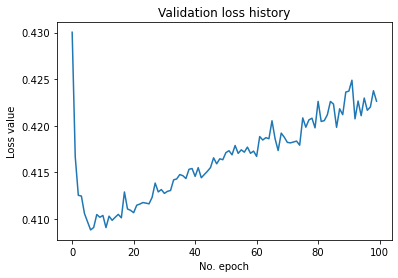

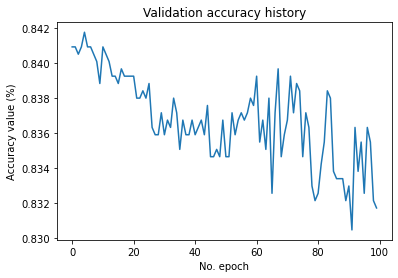

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2014
           1       0.32      0.05      0.09       381

    accuracy                           0.83      2395
   macro avg       0.58      0.51      0.50      2395
weighted avg       0.76      0.83      0.78      2395



#### Decision Tree gave the best performance